# Introduction and Background

One of the most pressing issues that we have in the United States today is poverty. While a common idea is that it involves a person or community lacking the necessary finances, resources, or even shelter. Even so, there is a far-reaching meaning when we closely look at what factors are associated with poverty. This led us to our next interest on how one's income is affected. Thus, in extension to our last project, we will be studying what attributes such as Race, Sex, Age, etc. that may affect an individual's income. We aim to apply the statistical techniques and tools that we have learned from this semester to build predictive models and discover what predictors are significant to this study. Additionally, we were interested in looking at Minnesota and Colorado individually and see how our prediction models compare at the end of the project.

For the purpose of this study, an individual or personal income is reported based on the previous year of the person's wages, salaries, and other type of money income received from an employer.

## Importing Dataset ##

The data was extracted from the IPUMS website, a public database that provides numerous samples from around the world, where it includes the American Community Survey (ACS) conducted by the U.S Census Bureau. This online database provides us the option to select attributes that cater towards our study in regards to predicting an individual’s income. This dataset will be the 2018 ACS (5-year estimate) and is observational since it has been collected to measure or survey an individual's income levels, demographics, employment rates, etc. for each state. The variables in the dataset includes:

* **YEAR**: Year when the ACS was conducted
* **STATEFIP**: State FIPS Code
* **FAMSIZE**: Number of family members in household **[continuous]**
* **SEX**: Male or Female **[categorical]**
* **AGE**: Age in years  **[continous]**
* **MARRNO**: Number of times the person was married **[continous]**
* **RACE**: Race (original version) **[categorical]**
* **YRSUSA1**: 	Years lived in the US **[continous]**
* **EDUC**: Educational attainment **[categorical]**	
* **CLASSWKR**: Class of worker	 **[continous]**
* **UHRSWORK**: Usual hours worked per week **[continous]**
* **INCWAGE**: Individual's income and salary wage **[continous]**
* **POVERTY**: Poverty Status **[categorical]**
* **OCCSCORE**: Occupational Score **[continous]**
* **DIFFSENS**: Vision or hearing difficulty **[categorical]**

In [2]:
library(dplyr)
library(ggplot2)
library(plyr)
library(zoo)
library(tidyr)
library(ggplot2)
library(gridExtra)
library(tidyverse)
library(leaps)
library(car)
library(corrplot)

acs_2018 = read.table("usa_00007.csv", sep = ",", header = TRUE)
acs_2018_1 = read.table("cleaned_acs_2018.csv", sep = ",", header = TRUE)
head(acs_2018)

summary(acs_2018)
# Filter state to Minnesota
minn = filter(acs_2018, STATEFIP == '27')
minn1 = filter(acs_2018_1, STATEFIP == 'Minnesota')
minn = data.frame(minn)

#Filter state to Colorado
CO = filter(acs_2018, STATEFIP == "8")
CO_Cleaned = filter(acs_2018_1, STATEFIP == "Colorado")

YEAR STATEFIP FAMSIZE SEX AGE MARRNO RACE RACED YRSUSA1 EDUC EDUCD CLASSWKR
1 2018 8        1       1   22  0      1    100   0        6    63   2       
2 2018 8        5       2   58  1      1    100   0        6    63   2       
3 2018 8        5       1   58  1      1    100   0       11   115   1       
4 2018 8        5       2   34  1      1    100   0       11   114   2       
5 2018 8        5       1   39  1      1    100   0       11   114   2       
6 2018 8        2       2   60  1      1    100   0       10   101   2       
  CLASSWKRD UHRSWORK INCWAGE POVERTY OCCSCORE DIFFSENS
1 25        70       31852     0     20       2       
2 22        25       31852   501     25       1       
3 13        20           0   501     62       1       
4 23        40       53086   501     42       1       
5 23        40       44593   501     27       1       
6 22        45       47778   501     42       1

      YEAR         STATEFIP        FAMSIZE            SEX       
 Min.   :2018   Min.   : 8.00   Min.   : 1.000   Min.   :1.000  
 1st Qu.:2018   1st Qu.: 8.00   1st Qu.: 2.000   1st Qu.:1.000  
 Median :2018   Median :27.00   Median : 2.000   Median :2.000  
 Mean   :2018   Mean   :17.52   Mean   : 2.573   Mean   :1.504  
 3rd Qu.:2018   3rd Qu.:27.00   3rd Qu.: 3.000   3rd Qu.:2.000  
 Max.   :2018   Max.   :27.00   Max.   :17.000   Max.   :2.000  
      AGE            MARRNO            RACE           RACED      
 Min.   :18.00   Min.   :0.0000   Min.   :1.000   Min.   :100.0  
 1st Qu.:34.00   1st Qu.:1.0000   1st Qu.:1.000   1st Qu.:100.0  
 Median :50.00   Median :1.0000   Median :1.000   Median :100.0  
 Mean   :49.63   Mean   :0.9672   Mean   :1.408   Mean   :142.2  
 3rd Qu.:63.00   3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:100.0  
 Max.   :95.00   Max.   :3.0000   Max.   :9.000   Max.   :990.0  
    YRSUSA1           EDUC            EDUCD           CLASSWKR   
 Min.   : 0.00   

Here, we would like to build predictive models and formulate a hypothesis in regards to the potential predictors that may affect an individual income or wage (**INCWAGE**) for the state of Colorado and Minnesota. Additionally, IPUMS provides a Data Documentation Initiative (DDI) file, in short, this is to help us relabel some values that were assigned to decriptive labels (i.e, the variable **SEX**, Male and Female code values are 1 and 2 respectively) and provide us with details regarding the variables that are included in the dataset.

# Method and Results #

After importing the dataset, a large portion of the project was spent cleaning and manipulationg the dataset. The process consited of merging datasets, fixing structural errors, removing irrelevant data, and amending variables in order to ensure the dataset are consistent with each other. The unfiltered dataset had raw numerical values that corresponded with a category, while the cleaned dataset had category descriptive values. However, due to complications, Anaconda environment did not support the **ipumsr** package. To work around this issue, we utilized R Studio and read_ipums_ddi() function to relabel the values within the original dataset to a more detailed label.

To polish our datasets, we worked with both the unfiltered and cleaned the dataset to impute correct values and corresponding descriptions. We noticed that there were variables had values that represented NA's and to many descriptive elements for what we needed. The mismatched values were then removed by replacing the zero's with NA's so that the linear model do not interpret these zero values as actual input. We reduced the amount of description for the Race and Education variables due to having a subtantial amount of redundant factors.

In [3]:
# Utilized R Studio in order to use ipumsr package to relabel values to the actual labels
# i.e, SEX values 1 will be changed to Male
minn$MARST = minn1$MARST
minn$CLASSWKR = minn1$CLASSWKR
minn$DIFFSENS = minn1$DIFFSENS
minn$SEX = minn1$SEX

# Grouping Chinese, Japanese, Other Asian, and Pacific Islander to Asian American
minn$RACE[minn$RACE == 1] = "White"
minn$RACE[minn$RACE == 2] = "Black/African American"
minn$RACE[minn$RACE == 3] = "American Indian or Alaska Native"
minn$RACE[minn$RACE == 4] = "Asian American or Pacific Islander"
minn$RACE[minn$RACE == 5] = "Asian American or Pacific Islander"
minn$RACE[minn$RACE == 6] = "Asian American or Pacific Islander"
minn$RACE[minn$RACE == 7] = "Other Race"
minn$RACE[minn$RACE == 8] = "Other Race"
minn$RACE[minn$RACE == 9] = "Other Race"

# Grouping Education Levels
minn$EDUC[minn$EDUC == 0] = "High School or Less"
minn$EDUC[minn$EDUC == 1] = "High School or Less"
minn$EDUC[minn$EDUC == 2] = "High School or Less"
minn$EDUC[minn$EDUC == 3] = "High School or Less"
minn$EDUC[minn$EDUC == 4] = "High School or Less"
minn$EDUC[minn$EDUC == 5] = "High School or Less"
minn$EDUC[minn$EDUC == 6] = "High School or Less"
minn$EDUC[minn$EDUC == 7] = "College or More"
minn$EDUC[minn$EDUC == 8] = "College or More"
minn$EDUC[minn$EDUC == 9] = "College or More"
minn$EDUC[minn$EDUC == 10] = "College or More"
minn$EDUC[minn$EDUC == 11] = "College or More"

# Changing 0 to NA, this is because of the IPUMS package used in R Studio changed the NA values to 0
minn$YRSUSA1[minn$YRSUSA1 == 0] = NA

# Utilized R Studio in order to use ipumsr package to relabel values to the actual labels
# i.e, SEX values 1 will be changed to Male
CO$MARST = CO_Cleaned$MARST
CO$CLASSWKR = CO_Cleaned$CLASSWKR
CO$DIFFSENS = CO_Cleaned$DIFFSENS
CO$SEX = CO_Cleaned$SEX

# Grouping Chinese, Japanese, Other Asian, and Pacific Islander to Asian American
CO$RACE[CO$RACE == 1] = "White"
CO$RACE[CO$RACE == 2] = "Black/African American"
CO$RACE[CO$RACE == 3] = "American Indian or Alaska Native"
CO$RACE[CO$RACE == 4] = "Asian American or Pacific Islander"
CO$RACE[CO$RACE == 5] = "Asian American or Pacific Islander"
CO$RACE[CO$RACE == 6] = "Asian American or Pacific Islander"
CO$RACE[CO$RACE == 7] = "Other Race"
CO$RACE[CO$RACE == 8] = "Other Race"
CO$RACE[CO$RACE == 9] = "Other Race"

# Grouping Education Levels
CO$EDUC[CO$EDUC == 0] = "High School or Less"
CO$EDUC[CO$EDUC == 1] = "High School or Less"
CO$EDUC[CO$EDUC == 2] = "High School or Less"
CO$EDUC[CO$EDUC == 3] = "High School or Less"
CO$EDUC[CO$EDUC == 4] = "High School or Less"
CO$EDUC[CO$EDUC == 5] = "High School or Less"
CO$EDUC[CO$EDUC == 6] = "High School or Less"
CO$EDUC[CO$EDUC == 7] = "College or More"
CO$EDUC[CO$EDUC == 8] = "College or More"
CO$EDUC[CO$EDUC == 9] = "College or More"
CO$EDUC[CO$EDUC == 10] = "College or More"
CO$EDUC[CO$EDUC == 11] = "College or More"

# Changing 0 to NA, this is because of the IPUMS package used 
# in R Studio changed the NA values to 0
CO$YRSUSA1[CO$YRSUSA1 == 0] = NA

# FAMSIZE, AGE, MARRNO, YRSUSA1, UHRSWORK, INCWAGE, OCCSCORE are continuous

In [4]:
mn = select(minn, -c(YEAR, STATEFIP, RACED, CLASSWKRD, EDUCD, POVERTY))
co = select(CO, -c(YEAR, STATEFIP, RACED, CLASSWKRD, EDUCD, POVERTY))
head(mn)

FAMSIZE SEX    AGE MARRNO RACE  YRSUSA1 EDUC                CLASSWKR       
1 3       Male   37  1      White NA      College or More     Works for wages
2 3       Female 37  1      White NA      College or More     Works for wages
3 2       Female 25  0      White NA      College or More     Works for wages
4 5       Female 43  1      White NA      College or More     Works for wages
5 5       Male   42  1      White NA      College or More     Works for wages
6 5       Female 18  0      White NA      High School or Less N/A            
  UHRSWORK INCWAGE OCCSCORE DIFFSENS                       
1 40        39815  42       No vision or hearing difficulty
2 50       106173  42       No vision or hearing difficulty
3 36        16988  16       No vision or hearing difficulty
4 32        45654  25       No vision or hearing difficulty
5 50        63704  30       No vision or hearing difficulty
6  0            0   0       No vision or hearing difficulty

Following the data cleaning process, we performed simple graphical summeries of the dataset to explore each variables, where we color coordinated the states with blue and green to Minnesota and Colorado respectively. This is to help distinguish between the plots, to remove any confusions, we will be keeping the colors consistent with the corresponding states. Furthermore, these graphical summaries is to help identify any new noticeable irregularies of the dataset. Note that **OCCSCORE** has an unusual amount of $0$ values, this was a similar irregularity that we found during the cleaning process. Thus, we replaced these values to NA to help with our analysis process later.

## Exploratory Analysis ##

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Removed 203025 rows containing non-finite values (stat_count).”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: b

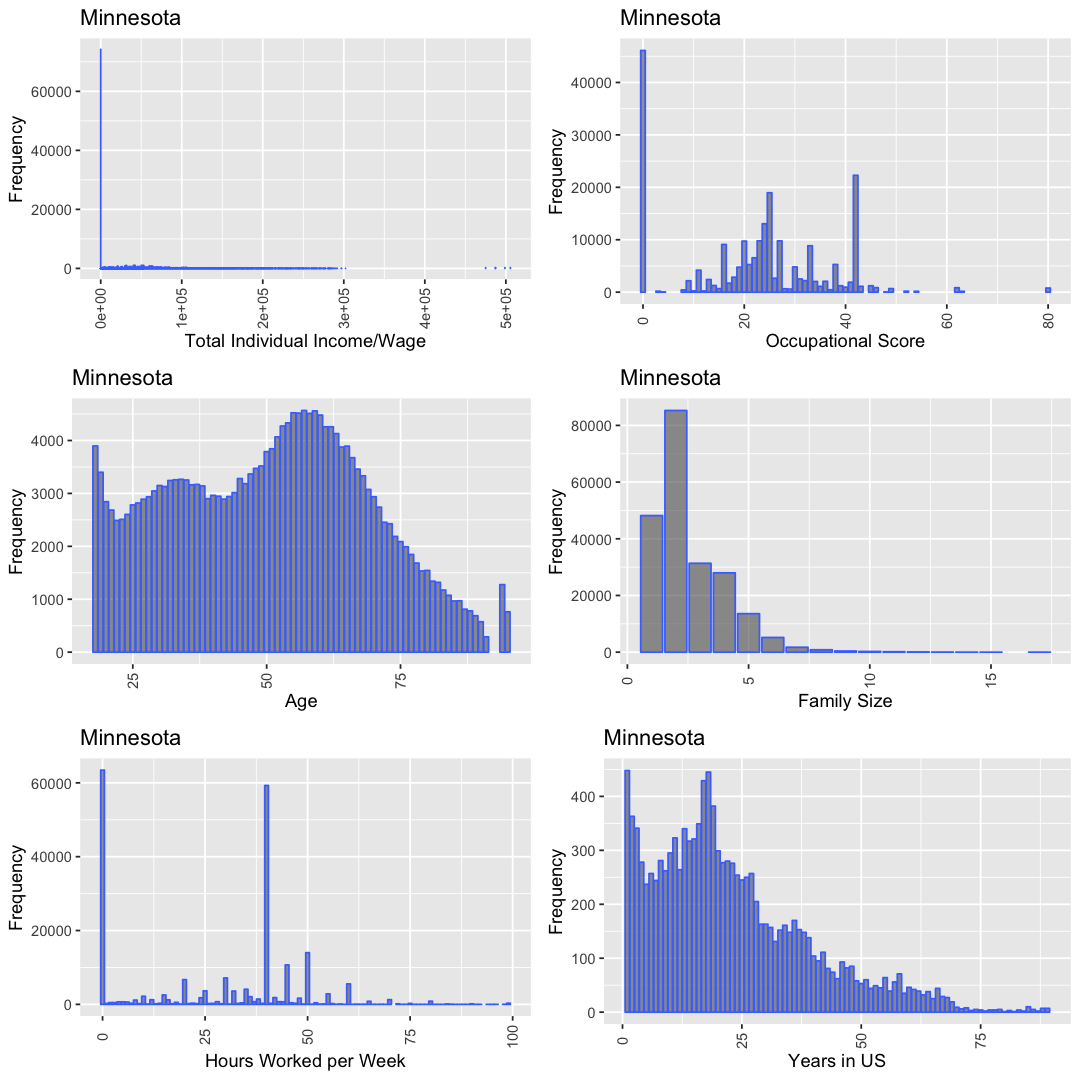

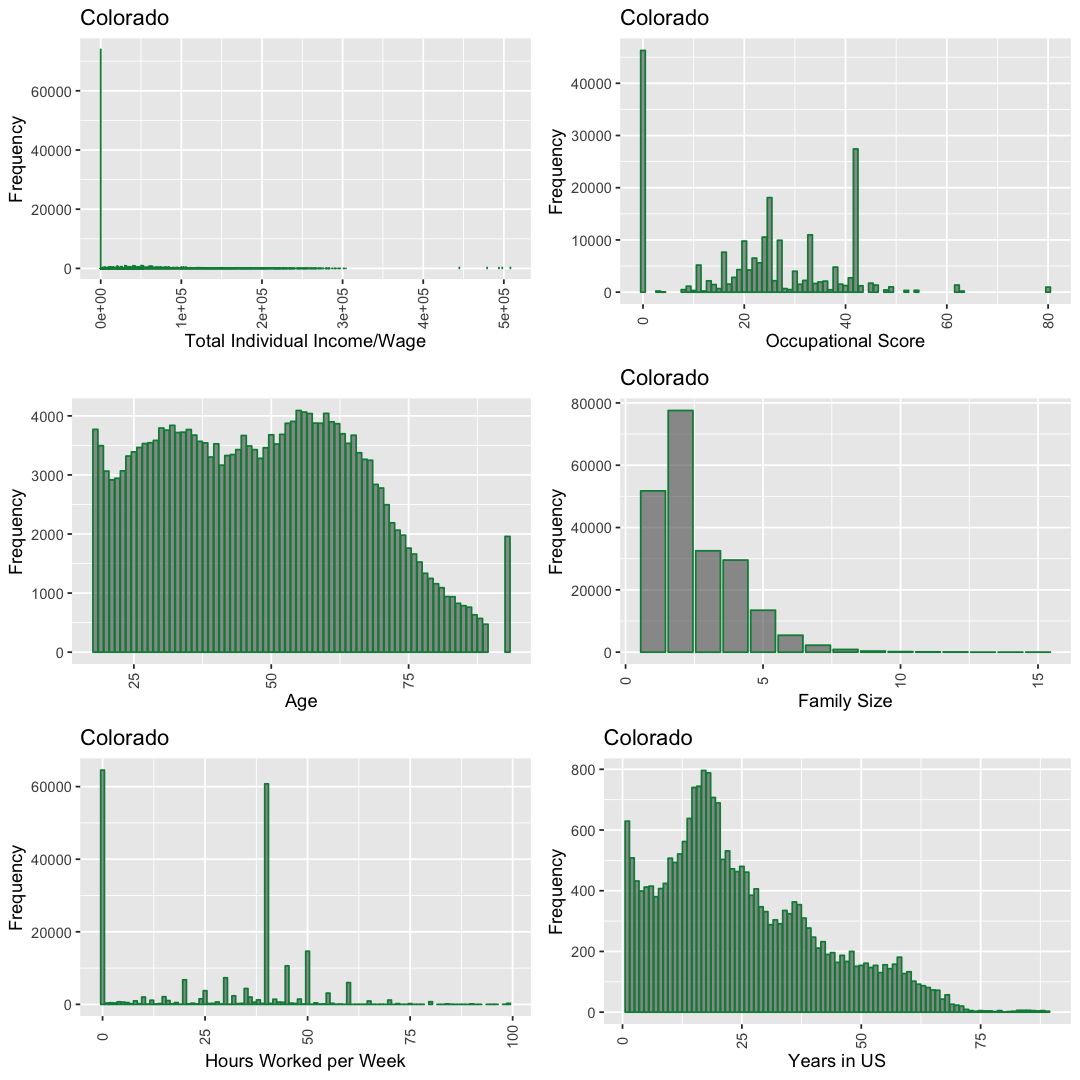

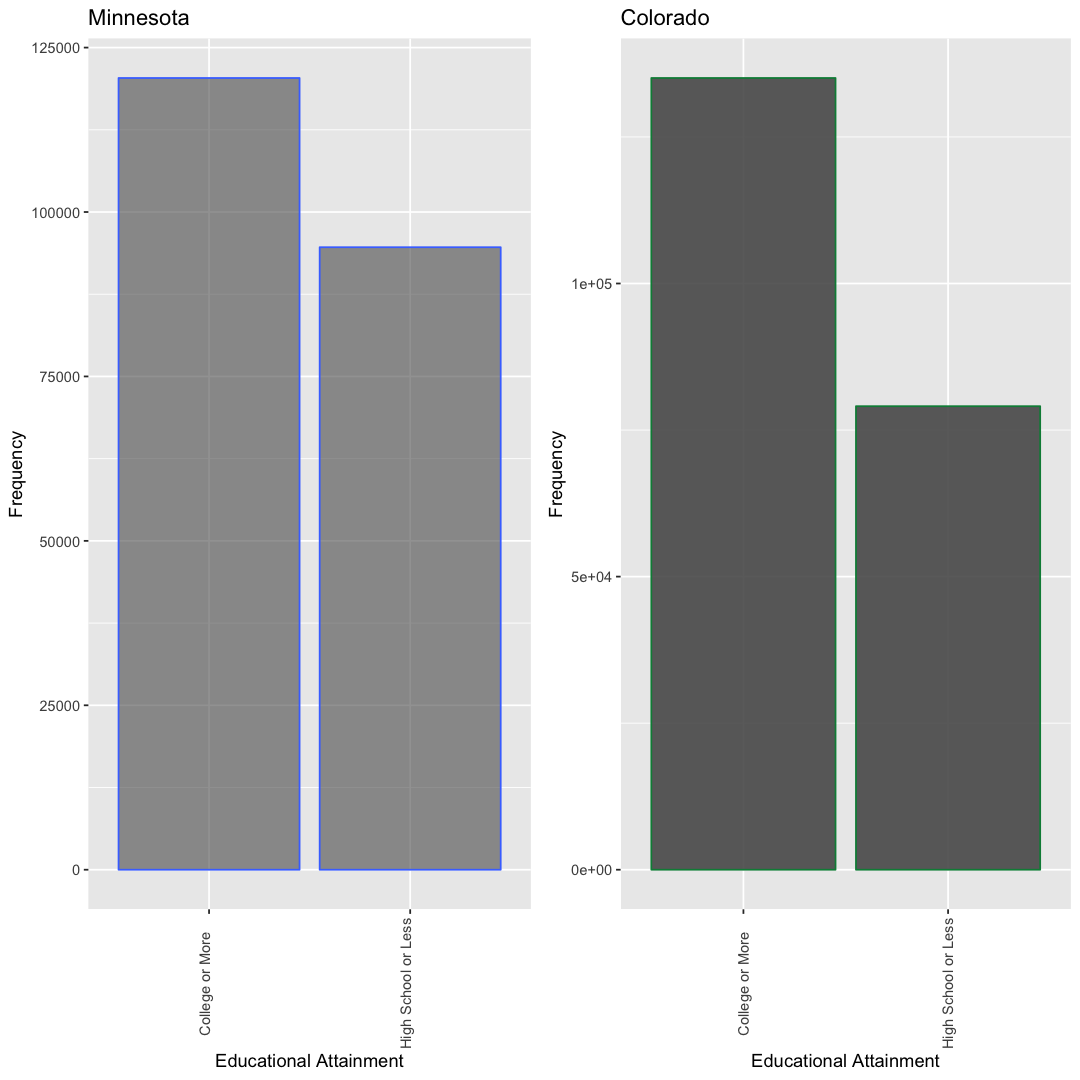

In [30]:
# Exploratory Data Analysis

# Histograms for numeric values
age_hist <- ggplot(mn, aes(x = mn$AGE)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Age") + ggtitle("Minnesota") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

famsize_hist <- ggplot(mn, aes(x = mn$FAMSIZE)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Family Size") + ggtitle("Minnesota") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

hours_hist <- ggplot(mn, aes(x = mn$UHRSWORK)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Hours Worked per Week") + ggtitle("Minnesota") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

edu_hist_m <- ggplot(mn, aes(x = mn$EDUC)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.1)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Educational Attainment") + ggtitle("Minnesota") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

inc_hist <- ggplot(mn, aes(x = mn$INCWAGE)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Total Individual Income/Wage") + ggtitle("Minnesota") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

occ_hist <- ggplot(mn, aes(x = mn$OCCSCORE)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Occupational Score") + ggtitle("Minnesota") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

years_hist <- ggplot(mn, aes(x = mn$YRSUSA1)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Years in US") + ggtitle("Minnesota") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")
grid.arrange(inc_hist, occ_hist, age_hist, famsize_hist, 
             hours_hist, years_hist, nrow=3)

# Colorado Exploratory Data Analysis

# Histograms for numeric values
age_hist <- ggplot(co, aes(x = co$AGE)) +
    geom_histogram(color="springgreen4", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Age") + ggtitle("Colorado") +
    ylab("Frequency") + labs(fill = "") + ggtitle("") + theme(legend.position = "none")

famsize_hist <- ggplot(co, aes(x = co$FAMSIZE)) +
    geom_histogram(color="springgreen4", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Family Size") + ggtitle("Colorado") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

hours_hist <- ggplot(co, aes(x = co$UHRSWORK)) +
    geom_histogram(color="springgreen4", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Hours Worked per Week") + ggtitle("Colorado") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

edu_hist_c <- ggplot(co, aes(x = co$EDUC)) +
    geom_histogram(color="springgreen4", alpha=0.9, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Educational Attainment") + ggtitle("Colorado") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

inc_hist <- ggplot(co, aes(x = co$INCWAGE)) +
    geom_histogram(color="springgreen4", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Total Individual Income/Wage") + ggtitle("Colorado") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

occ_hist <- ggplot(co, aes(x = co$OCCSCORE)) +
    geom_histogram(color="springgreen4", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Occupational Score") + ggtitle("Colorado") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

years_hist <- ggplot(co, aes(x = co$YRSUSA1)) +
    geom_histogram(color="springgreen4", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Years in US") + ggtitle("Colorado") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

grid.arrange(inc_hist, occ_hist, age_hist, famsize_hist, hours_hist, years_hist,
             nrow=3)

grid.arrange(edu_hist_m, edu_hist_c, nrow=1)

Above, we printed histograms corresponding to each numeric variable - **income, occupational score, age, family size, hours worked per week, years in the U.S.**, and **educational attainment** - to explore each variables distribution. **Educational attainment** was reduced from $10$ to $2$ categories for simplicity. 

Looking at Minnesota's data none of the graphs have a normal distribution especially **income, occupational score, and hours worked per week,**. Most of incomes values are in the zero range, however, there is a slight hump there on after. We believe that most of the income values are near $0$ because of incomplete observations. Our idea is that many citizens left out income information for privacy reasons, however, they're can be numerous reasons why there are incomplete observations. There a few outliers at $500,000$ which means the wealthiest individuals(the $1\%$ in America). **Occupational score** follows a random histogram with most of its survey at $0$ and between $15$ to $43$. The numeric values that are graphed on the x-axes represents an occupation therefore we notice that many people  between $15$ and $43$ have similar jobs. A few outliers reside at the values $80$ which can mean prestigous executive jobs. **Hours worked per week** has $2$ large pillars in there graph, $0$ and $40$. This is logical because most people work $40$ hours per week. We think the $0$th pillar represents individuals with no jobs. A tiny fraction of ourliers work $100$ hours week, which do exist. 

Minnesotas **age** histogram resembles a bimodal distribution, **family size** has a skewed distribution, and **years in the U.S.** has a skewed bimodal distribution. Looking at the **age** histogram most individuals are around the ages $50$ to $70$ and a less larger amount around $18$ to $35$. Which is odd since we hypothesized that most working individuals would be around $25$ to $40$. The **family size** histogram skews around a family size of $2$ then decrease down to a family of $6$. We see outliers at a family size of $15$, wow! **Years in the U.S.** has two large distribution points at $0$ and $20$. This can mean that many people in $2018$ just moved to Minnesota and large portion of the population has lived in Minnesota for $20$ years. 

Observing Colorado's histograms we see similar distributions as Minnesotas. Colorado's histrograms are on the same variable details as Minnesota's therefore we will do more comparing than explanation. If the reader is intersted in more details about the variables please visit Ipums. **Individual income** has a similar distribution to Minnesota's **individual income** histrogram, however, Colorado has a smaller hump tham Minessota's graph. Colorado also has more outliers at $500,000$ than Minnesota's which is interesting. **Occupation score** has a similar range as Minnesota's score, but, Colorado has more individuals at the occupation score of $40$. **Age** is distribution is much different than Minnesota's. Most people's age in Minnesota was around $50$ to $70$ with a smaller group around $18$ to $40$. Notice Colorado's age group has similar peak at $25$ to $40$ and $50$ to $70$. We can see more younger people work in Colorado than Minnesota. **Family Size** and **Hours worked per week** is almost the same as Minnesota's histogram so we wont comment more on that than what is mentioned above. **Years in the U.S.** has a smaller amount of people who have $0$ years in the U.S. than Minnesota's. This could mean that Colorado's had less new residents in $2018$ than Minnesota. 

Our last two graphs **education attainment** shows the amount of individuals would graduate or attended college vs the individuals who graduate or attened high school. Colorado and Minnesota have more individuals that graudate or attend college, however, Colorado has more individuals that graduate or attended high school than Minnesota. 

In [58]:
mn$OCCSCORE[mn$OCCSCORE == 0] = NA
co$OCCSCORE[co$OCCSCORE == 0] = NA

## AIC and BIC Graphs ##

Next, we used AIC and BIC to help us with the model selection process in terms of RSS (size $k = 1, 2, \cdots, 8$. The table below will helps us with what the "best" model that we should move on with.

In [6]:
# corr = cor(model.matrix(lmod_co)[,-1])

n = dim(mn)[1]; 
regmn = regsubsets(INCWAGE ~ ., data = mn, really.big=T)
rs = summary(regmn)
cat("Table of best models (in terms of RSS) for the Minnesota dataset:")
rs$which

m = dim(co)[1]; 
regCO = regsubsets(INCWAGE ~ ., data = co, really.big=T)
crs = summary(regCO)
cat("Table of best models (in terms of RSS) for the Minnesota dataset:")
crs$which

Table of best models (in terms of RSS) for the Minnesota dataset:

(Intercept) FAMSIZE SEXMale AGE   MARRNO
1 TRUE        FALSE   FALSE   FALSE FALSE 
2 TRUE        FALSE   FALSE   FALSE FALSE 
3 TRUE        FALSE   FALSE    TRUE FALSE 
4 TRUE        FALSE   FALSE   FALSE FALSE 
5 TRUE        FALSE   FALSE    TRUE FALSE 
6 TRUE        FALSE   FALSE    TRUE FALSE 
7 TRUE        FALSE    TRUE    TRUE FALSE 
8 TRUE        FALSE    TRUE    TRUE  TRUE 
  RACEAsian American or Pacific Islander RACEBlack/African American
1 FALSE                                  FALSE                     
2 FALSE                                  FALSE                     
3 FALSE                                  FALSE                     
4 FALSE                                  FALSE                     
5 FALSE                                  FALSE                     
6 FALSE                                  FALSE                     
7 FALSE                                  FALSE                     
8 FALSE                                  FALSE                     
  RACEOther Race RACEWhite YRSUSA1 EDUCHigh School or Less
1 FALSE          FALSE     FALSE   FALSE                  
2 FALSE          FALSE     FALSE   FALSE                  
3 FALSE          FALSE     FALSE   FALSE                  
4 FALSE          FALSE     FALSE   FALSE                  
5 FALSE          FALSE     FALSE   FALSE                  
6 FALSE          FALSE     FALSE    TRUE                  
7 FALSE          FALSE     FALSE    TRUE                  
8 FALSE          FALSE     FALSE    TRUE                  
  CLASSWKRSelf-employed CLASSWKRWorks for wages UHRSWORK OCCSCORE
1 FALSE                 FALSE                   FALSE    TRUE    
2 FALSE                 FALSE                    TRUE    TRUE    
3 FALSE                 FALSE                    TRUE    TRUE    
4  TRUE                  TRUE                    TRUE    TRUE    
5  TRUE                  TRUE                    TRUE    TRUE    
6  TRUE                  TRUE                    TRUE    TRUE    
7  TRUE                  TRUE                    TRUE    TRUE    
8  TRUE                  TRUE                    TRUE    TRUE    
  DIFFSENSNo vision or hearing difficulty
1 FALSE                                  
2 FALSE                                  
3 FALSE                                  
4 FALSE                                  
5 FALSE                                  
6 FALSE                                  
7 FALSE                                  
8 FALSE

Table of best models (in terms of RSS) for the Minnesota dataset:

(Intercept) FAMSIZE SEXMale AGE   MARRNO
1 TRUE        FALSE   FALSE   FALSE FALSE 
2 TRUE        FALSE   FALSE   FALSE FALSE 
3 TRUE        FALSE   FALSE   FALSE FALSE 
4 TRUE        FALSE   FALSE   FALSE FALSE 
5 TRUE        FALSE   FALSE   FALSE FALSE 
6 TRUE        FALSE   FALSE    TRUE FALSE 
7 TRUE        FALSE    TRUE    TRUE FALSE 
8 TRUE        FALSE    TRUE    TRUE  TRUE 
  RACEAsian American or Pacific Islander RACEBlack/African American
1 FALSE                                  FALSE                     
2 FALSE                                  FALSE                     
3 FALSE                                  FALSE                     
4 FALSE                                  FALSE                     
5 FALSE                                  FALSE                     
6 FALSE                                  FALSE                     
7 FALSE                                  FALSE                     
8 FALSE                                  FALSE                     
  RACEOther Race RACEWhite YRSUSA1 EDUCHigh School or Less
1 FALSE          FALSE     FALSE   FALSE                  
2 FALSE          FALSE     FALSE   FALSE                  
3 FALSE          FALSE     FALSE    TRUE                  
4 FALSE          FALSE     FALSE   FALSE                  
5 FALSE          FALSE     FALSE    TRUE                  
6 FALSE          FALSE     FALSE    TRUE                  
7 FALSE          FALSE     FALSE    TRUE                  
8 FALSE          FALSE     FALSE    TRUE                  
  CLASSWKRSelf-employed CLASSWKRWorks for wages UHRSWORK OCCSCORE
1 FALSE                 FALSE                   FALSE    TRUE    
2 FALSE                 FALSE                    TRUE    TRUE    
3 FALSE                 FALSE                    TRUE    TRUE    
4  TRUE                  TRUE                    TRUE    TRUE    
5  TRUE                  TRUE                    TRUE    TRUE    
6  TRUE                  TRUE                    TRUE    TRUE    
7  TRUE                  TRUE                    TRUE    TRUE    
8  TRUE                  TRUE                    TRUE    TRUE    
  DIFFSENSNo vision or hearing difficulty
1 FALSE                                  
2 FALSE                                  
3 FALSE                                  
4 FALSE                                  
5 FALSE                                  
6 FALSE                                  
7 FALSE                                  
8 FALSE

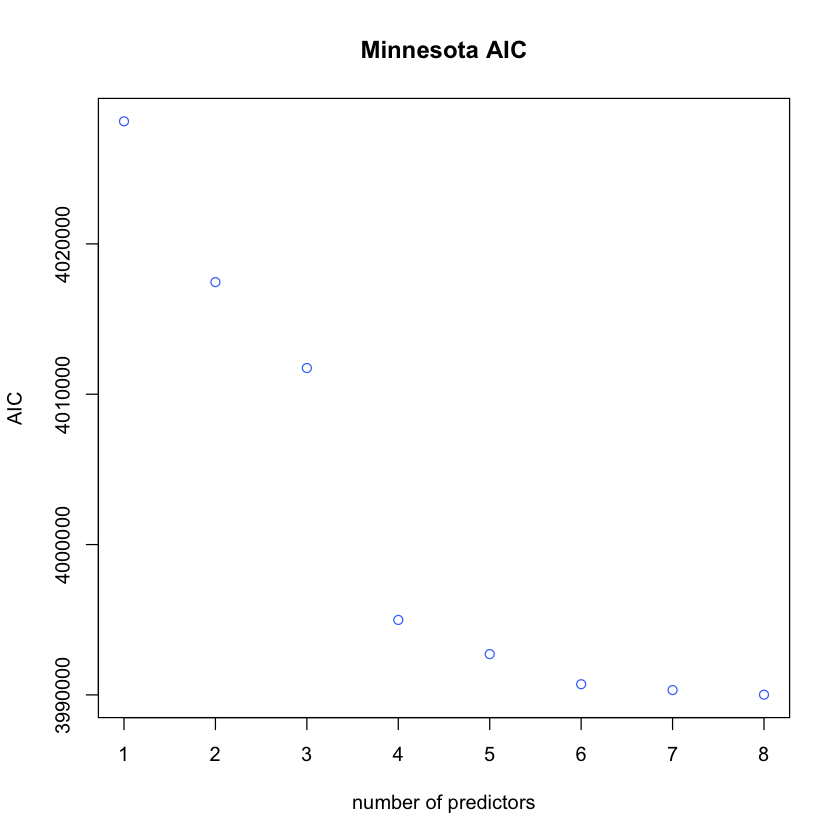

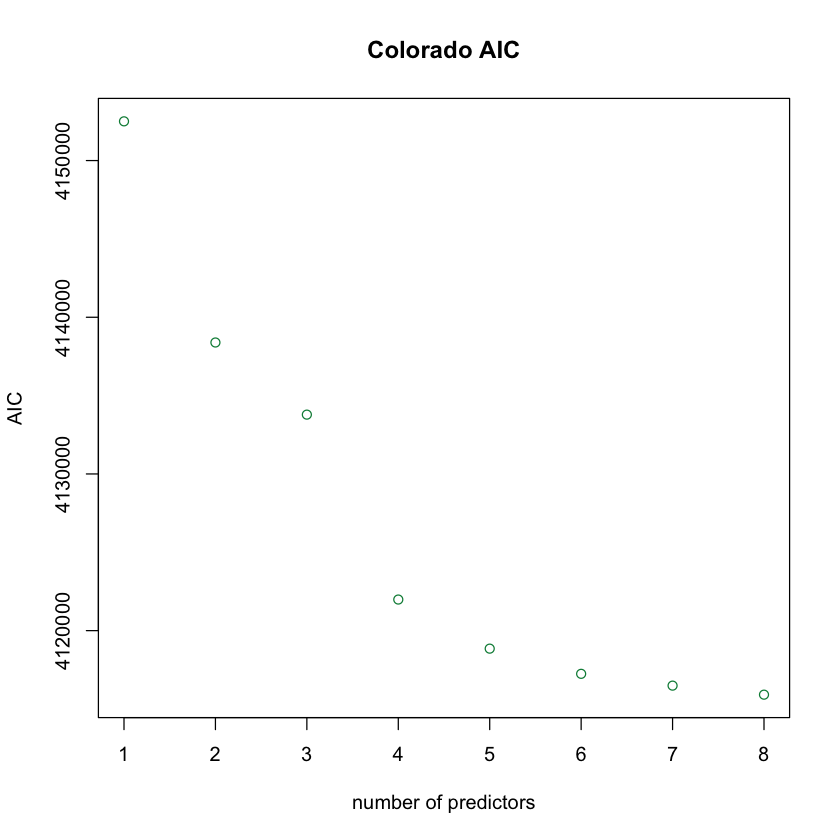

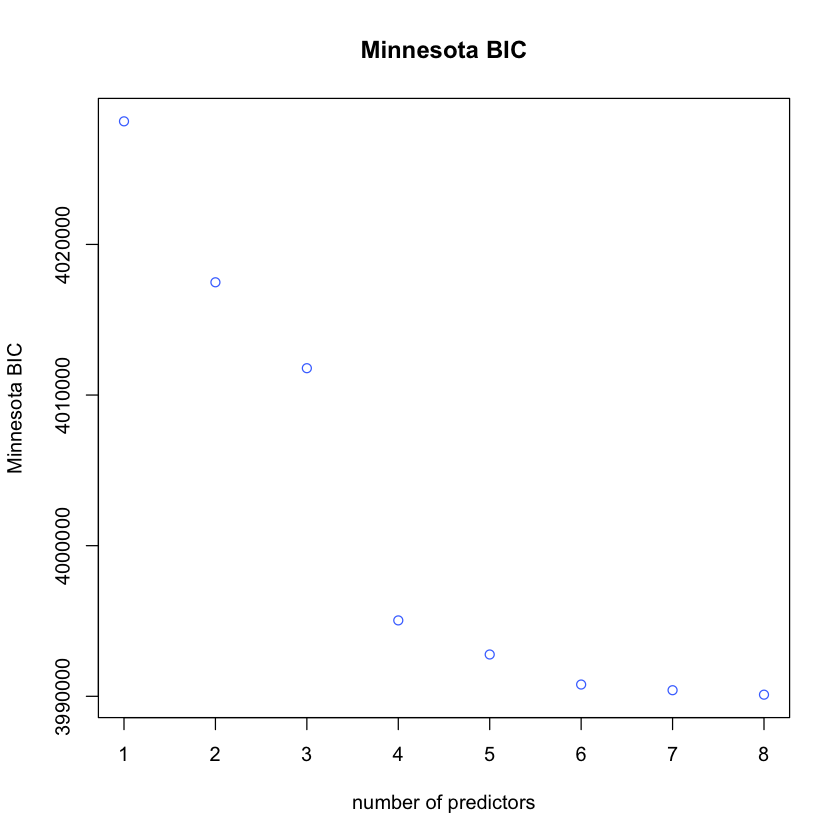

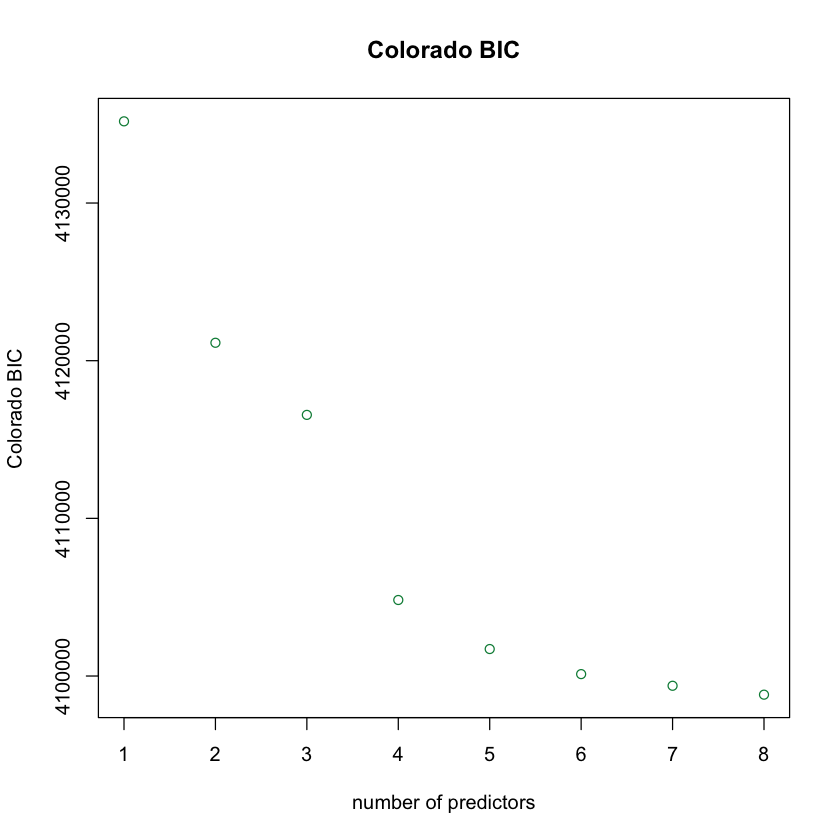

In [7]:
AIC_m = 2*(2:9) + n*log(rs$rss/n)
plot(AIC_m ~ I(1:8), xlab = 'number of predictors', ylab = 'AIC', main = "Minnesota AIC",
     col = "royalblue1")

AIC_c = 2*(2:9) + n*log(crs$rss/m)
plot(AIC_c ~ I(1:8), xlab = 'number of predictors', ylab = 'AIC', main = "Colorado AIC",
    col = "springgreen4")

# Best predictors in terms of AIC
# 8 predictors - SEX, AGE, MARRNO, EDUC, CLASSWKR, UHRSWORK, OCCSCORE
# 7 predictors - SEX, AGE, EDUC, CLASSWKR, UHRSWORK, OCCSCORE
# 6 predictors - AGE, EDUC, CLASSWKR, UHRSWORK, OCCSCORE

BIC_m = log(n)*(2:9) + n*log(rs$rss/n) 
plot(BIC_m ~ I(1:8), xlab = "number of predictors", ylab = "Minnesota BIC", 
     main = "Minnesota BIC", col = "royalblue1")

BIC_c = log(m)*(2:9) + m*log(crs$rss/m) 
plot(BIC_c ~ I(1:8), xlab = "number of predictors", ylab = "Colorado BIC", 
     main = "Colorado BIC", col = "springgreen4")

# Best predictors in terms of BIC
# 8 predictors - SEX, AGE, MARRNO, EDUC, CLASSWKR, UHRSWORK, OCCSCORE
# 7 predictors - SEX, AGE, EDUC, CLASSWKR, UHRSWORK, OCCSCORE
# 6 predictors - AGE, EDUC, CLASSWKR, UHRSWORK, OCCSCORE

Our focus is on an indivdual income, hence, to select the best predictors for our linear model we applied AIC and BIC to Colorado and Minnesota to help select which predictors to move forward with. The `regsubset$which` table and AIC and BIC graph helped us decide which predictors to use. In the AIC graph for both Colorado and Minnesota, the best AIC for both was $8$, similarly, the best BIC was $8$. However, we wanted a definite answer that $8$ was the best number of predictors. Ergo, we concluded with the best three AIC and BIC values. We decided to move forward with $6$th,$7$th, and $8$th predictors. 

The $6$ predictors were **Age, Education, Class of Work, Hours worked, and Occupational score**. **Class of work** is interpreted as two predictors in `R`, self-employed and works for wages. The $7$th predictor added **SEX** and the $8$th predictor added **Marriage**. We decided to add **race** to the $8$th predictors because we believed that race is a huge factor in someone's income. So our $8$th predictor model was actually $9$.    

In [13]:
lm_1 = lm(INCWAGE ~ AGE + EDUC + CLASSWKR + UHRSWORK + OCCSCORE , mn)
lm_2 = lm(INCWAGE ~ SEX + AGE + EDUC + CLASSWKR + UHRSWORK + OCCSCORE, mn)
lm_3 = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + UHRSWORK + OCCSCORE, mn)
print("Anova test for Minnesota:")
anova(lm_1, lm_2)
anova(lm_2, lm_3)

lmc_1 = lm(INCWAGE ~ AGE + EDUC + CLASSWKR + UHRSWORK + OCCSCORE, co)
lmc_2 = lm(INCWAGE ~ SEX + AGE + EDUC + CLASSWKR + UHRSWORK + OCCSCORE, co)
lmc_3 = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + UHRSWORK + OCCSCORE, co)
print("Anova test for Colorado:")
anova(lmc_1, lmc_2)
anova(lmc_2, lmc_3)

[1] "Anova test for Minnesota:"


Res.Df RSS          Df Sum of Sq    F        Pr(>F)       
1 215015 3.665492e+14 NA           NA       NA            NA
2 215014 3.656511e+14  1 898090625983 528.1047 1.010242e-116

Res.Df RSS          Df Sum of Sq    F        Pr(>F)       
1 215014 3.656511e+14 NA           NA       NA            NA
2 215013 3.647418e+14  1 909300128691 536.0267 1.928465e-118

[1] "Anova test for Colorado:"


Res.Df RSS          Df Sum of Sq    F        Pr(>F)       
1 214117 4.474257e+14 NA           NA       NA            NA
2 214116 4.456595e+14  1 1.766195e+12 848.5642 3.457256e-186

Res.Df RSS          Df Sum of Sq    F       Pr(>F)      
1 214116 4.456595e+14 NA           NA      NA           NA
2 214115 4.446904e+14  1 969105699696 466.617 2.25252e-103

To test which linear model is best we utilized the F-test with significant level of $\alpha = 0.05$. For Colorado and Minnesota we compared the linear models with $6$ and $7$ predictors. We found that the p-values was less than $\alpha$ hence reject the reduced model, $6$ predictors, and compare the next following models, $7$ to $9$. In both states the p-value was less than $\alpha$ therefore we concluded with $9$ predictors. 


Call:
lm(formula = INCWAGE ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + 
    UHRSWORK + OCCSCORE, data = mn)

Residuals:
    Min      1Q  Median      3Q     Max 
-163669  -15422   -2560    7377  503409 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -9626.157    450.983  -21.34   <2e-16 ***
SEXMale                   4553.458    183.959   24.75   <2e-16 ***
AGE                        143.003      6.401   22.34   <2e-16 ***
MARRNO                    3493.393    150.888   23.15   <2e-16 ***
EDUCHigh School or Less  -9375.328    188.532  -49.73   <2e-16 ***
CLASSWKRSelf-employed   -60589.087    475.741 -127.36   <2e-16 ***
CLASSWKRWorks for wages -36307.390    402.289  -90.25   <2e-16 ***
UHRSWORK                  1108.137      6.065  182.72   <2e-16 ***
OCCSCORE                  1557.655     10.248  152.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 41190 on 215013 degree


Call:
lm(formula = INCWAGE ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + 
    UHRSWORK + OCCSCORE, data = co)

Residuals:
    Min      1Q  Median      3Q     Max 
-176638  -18078   -3621    9102  538657 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -14045.350    472.901  -29.70   <2e-16 ***
SEXMale                   6238.918    203.022   30.73   <2e-16 ***
AGE                        201.855      7.074   28.54   <2e-16 ***
MARRNO                    3259.486    150.893   21.60   <2e-16 ***
EDUCHigh School or Less  -9856.518    212.883  -46.30   <2e-16 ***
CLASSWKRSelf-employed   -60073.431    522.444 -114.98   <2e-16 ***
CLASSWKRWorks for wages -38802.663    438.651  -88.46   <2e-16 ***
UHRSWORK                  1255.505      6.669  188.25   <2e-16 ***
OCCSCORE                  1552.693     10.654  145.74   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45570 on 214115 degree

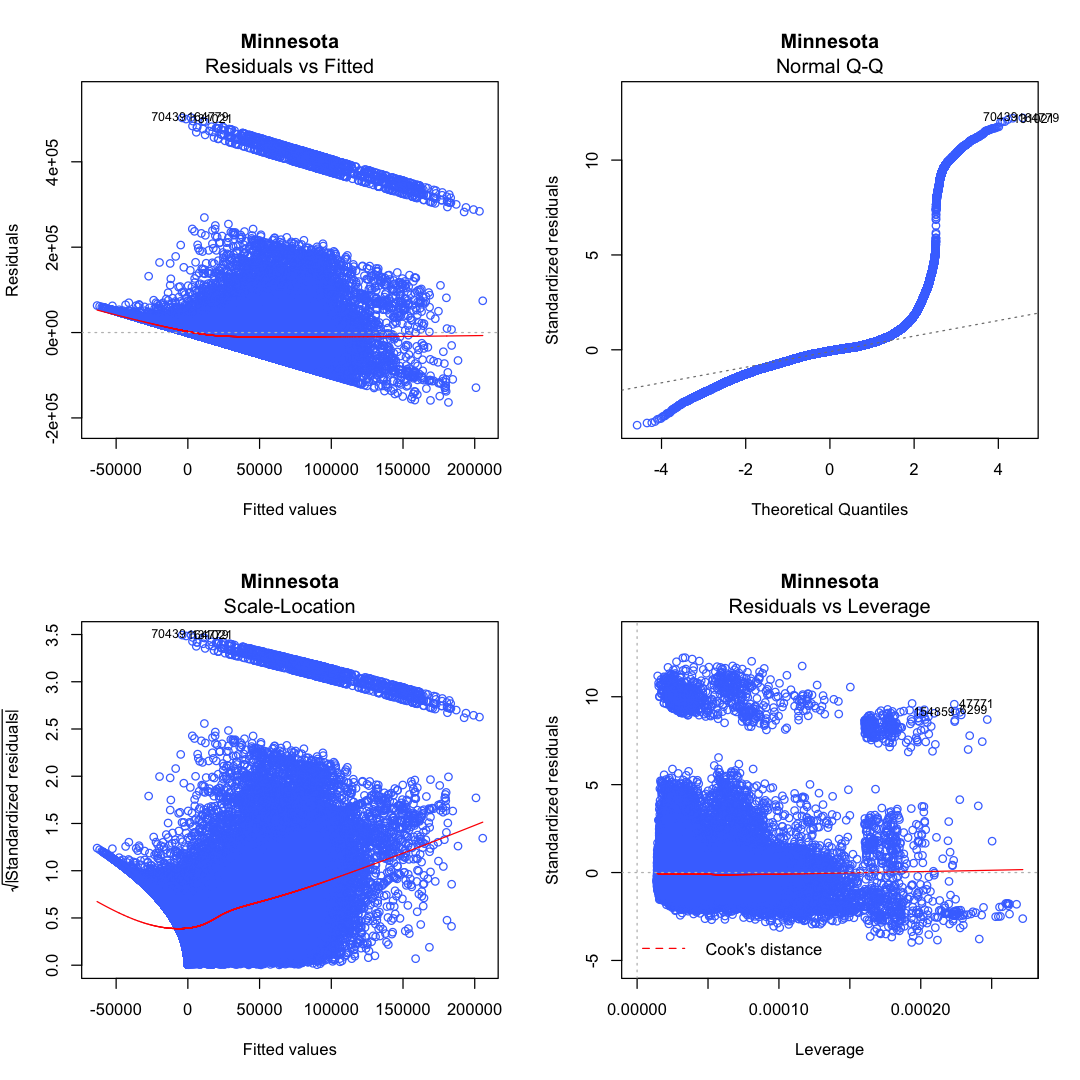

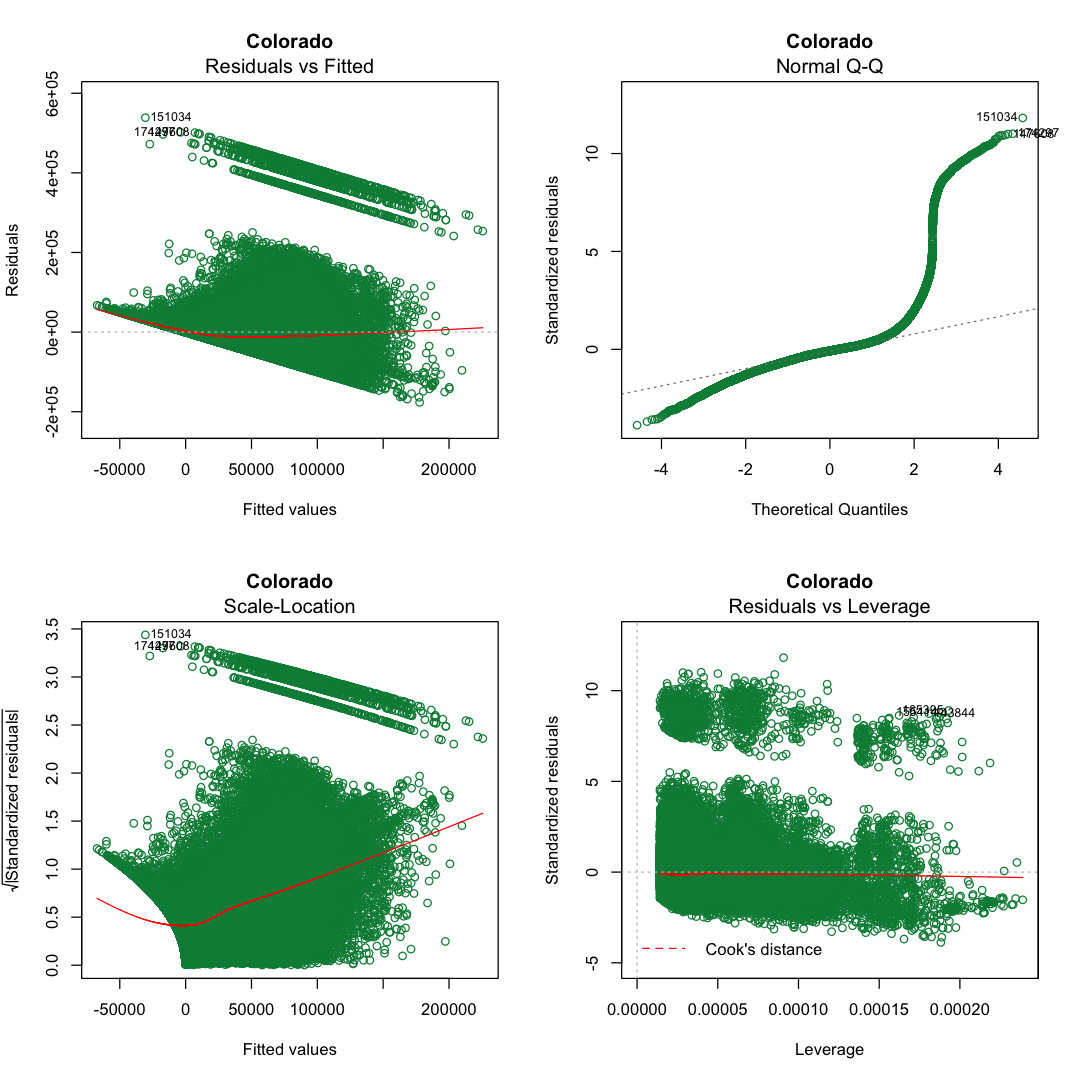

In [14]:
summary(lm_3)
options(repr.plot.width = 9, repr.plot.height = 9)
par(mfrow = c(2,2))
plot(lm_3, main = "Minnesota", col = "royalblue1")

summary(lmc_3)
options(repr.plot.width = 9, repr.plot.height = 9)
par(mfrow = c(2,2))
plot(lmc_3, main = "Colorado", col = "springgreen4")

Observing the summary of both $9$ predictor models we see that most predictors reject he null hypothes meaning they have an association to an individuals income. We found it surprising that African americans and other races did not have a significant p-values. Is known that most poor communities are black and other races so we found it odd that the model did not find it signficant. After further analysis, the reason the p-value for African Americans and other races is not significant is because the model associates any predictor that ***increases*** an individual income not decrease. This is the same reason why White has a significant p-value because there association affects an individuals income. 

The F-test for both models is below our significant level $\alpha = 0.05$ therefore we need one or more of the predictors printed. 

Notice that the $\beta_0$ for Minnesota is larger than Colorado's $\beta_0$. Both $\beta_0$ are in the negative meanign individuals have a decreasing income, however, Colorado has a larger decreasing income than Minnesota's. The $\beta_0$'s for Minnesota and Colorado are $-5415.4094$ and $-22812.300$, respectively. We also observed that if an individual is a male the amount of income increase the most when all other predictors are $0$. On the other hand, if an individual is self-employed their income decrease the most when all other precitors are $0$. These observations happen in both states. 

Inspecting the Residuals vs Fitted, Normal Q-Q, and Residual vs Leverage plots we see that both States show violation issues. First the Residual vs Fitted plot of Colorado and Minnesota appears to have nonconstance variance therefore violating the variance assumption. Both graphs have a negative trend gap between $600,000$ to $300,000$  and a negative trend around $0$. 

Furthermore, the Colorado and Minnesota Normal Q-Q plot show nonnormality. In both graphs we see a snake structure stray away from the linear line. Around the middle of the linear line, points seem to stabilize but as the quantile decreases the points veer away from the linear line. We believe that this is most likely caused from the violation of linearity assumption. We won't focus on the Scale-Location plot but note that it is a similar type of plot to the Residuals vs Fitted.

The Residuals vs Leverage in Minnesota has more scatter compared to Colorado's Residual vs Leverage. Yet, both plots show no potential influential points or any points crossing cooks distance. There are few outliers in both graphs and that can be explained from the exploratory analysis done above. Nevertheless, there are no points that we would consider influential points. 

## Transformations ##

In hopes to fix these issues we applied the square-root, logorithm, and inverse transformations to fix the nonconstant varaince, linearity violation, and nonnormality. Below we show plots corresponding to each transformation and the change the transformation has done. 

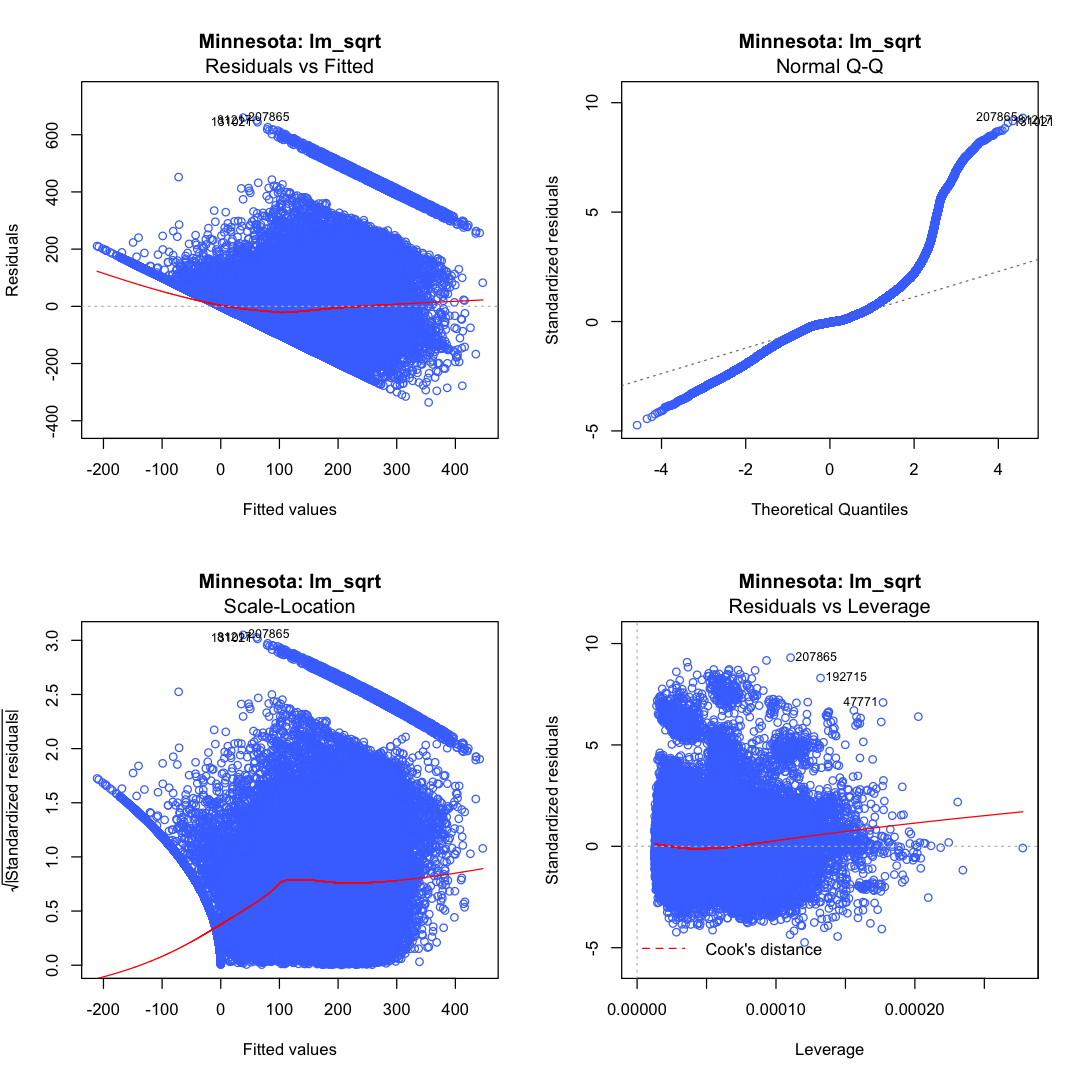

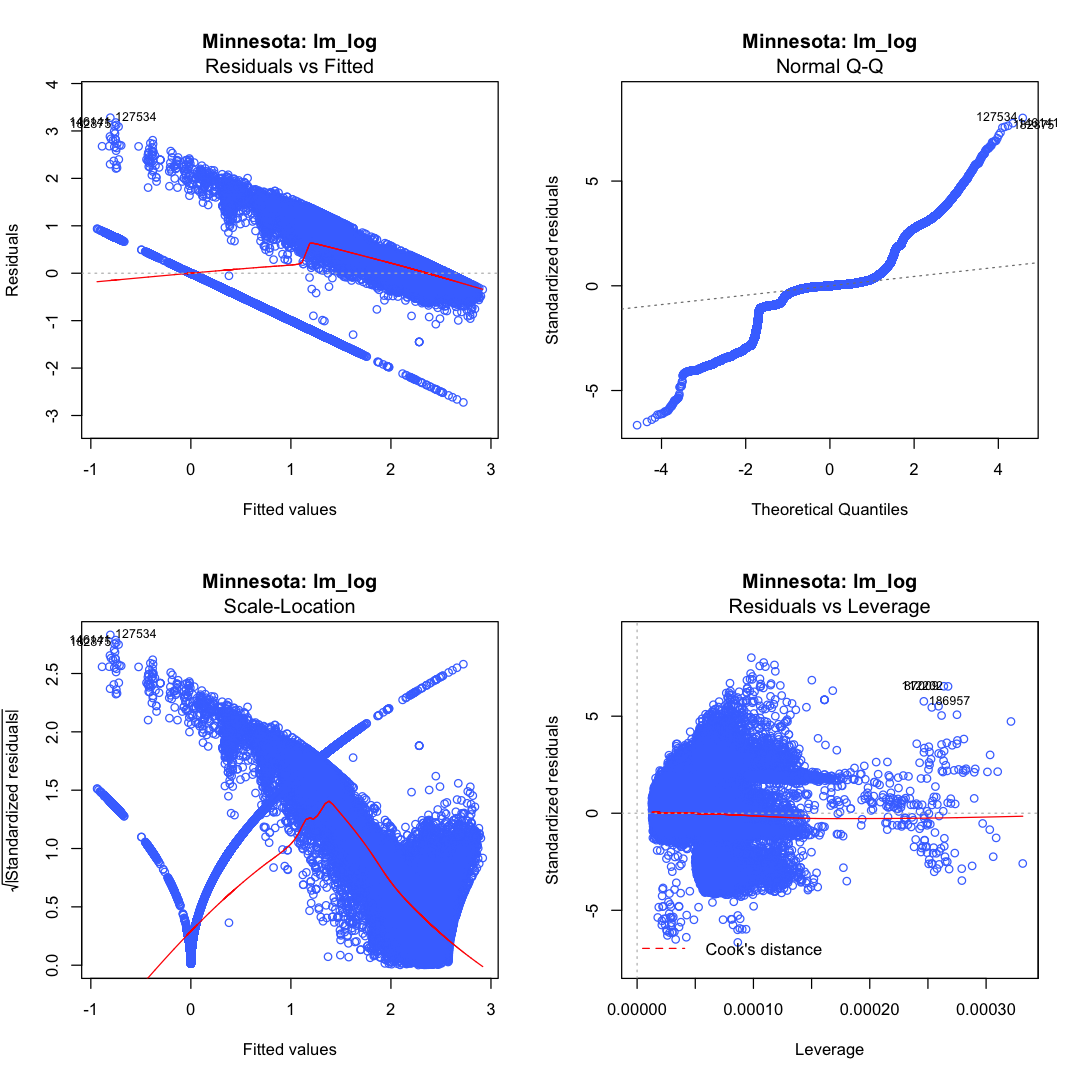

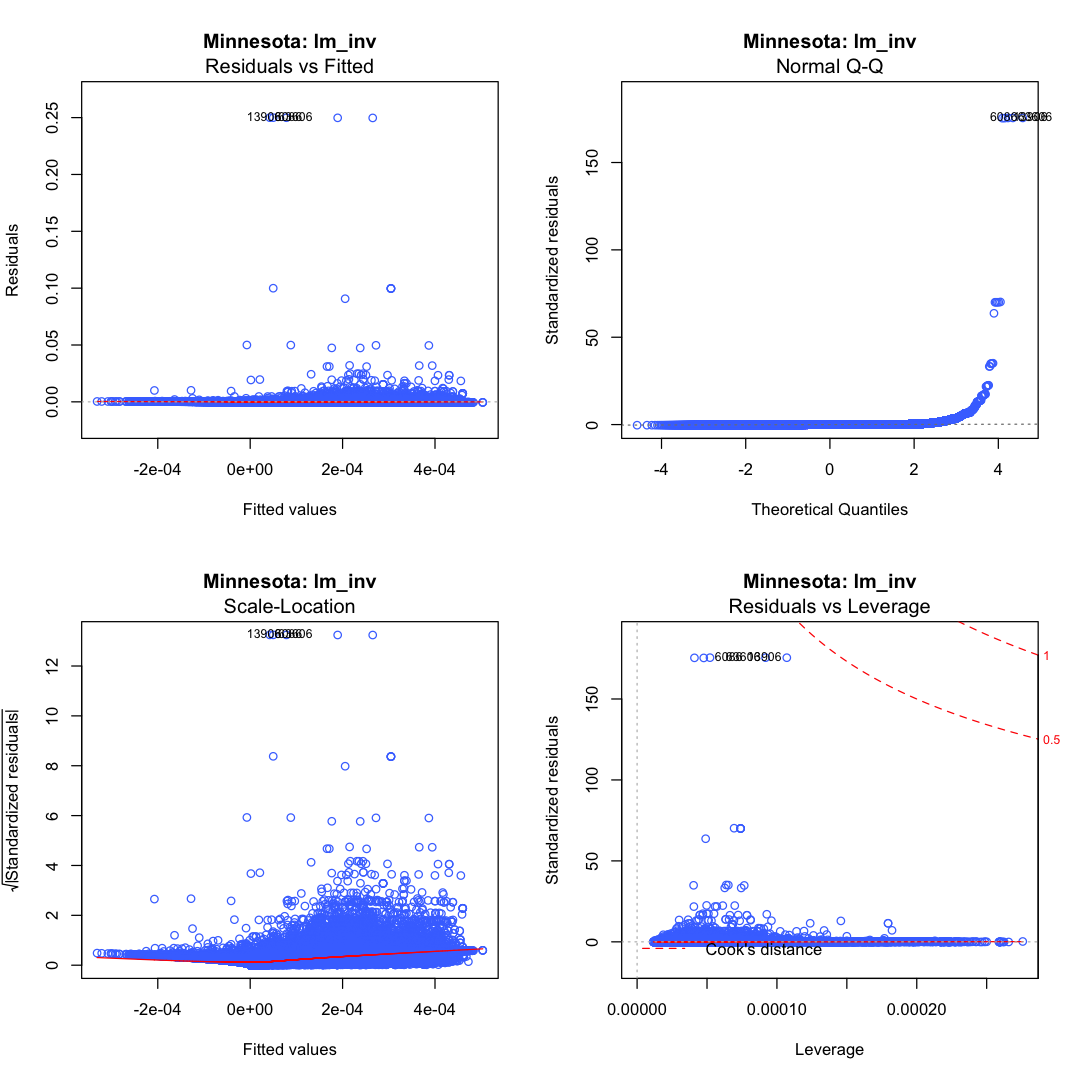

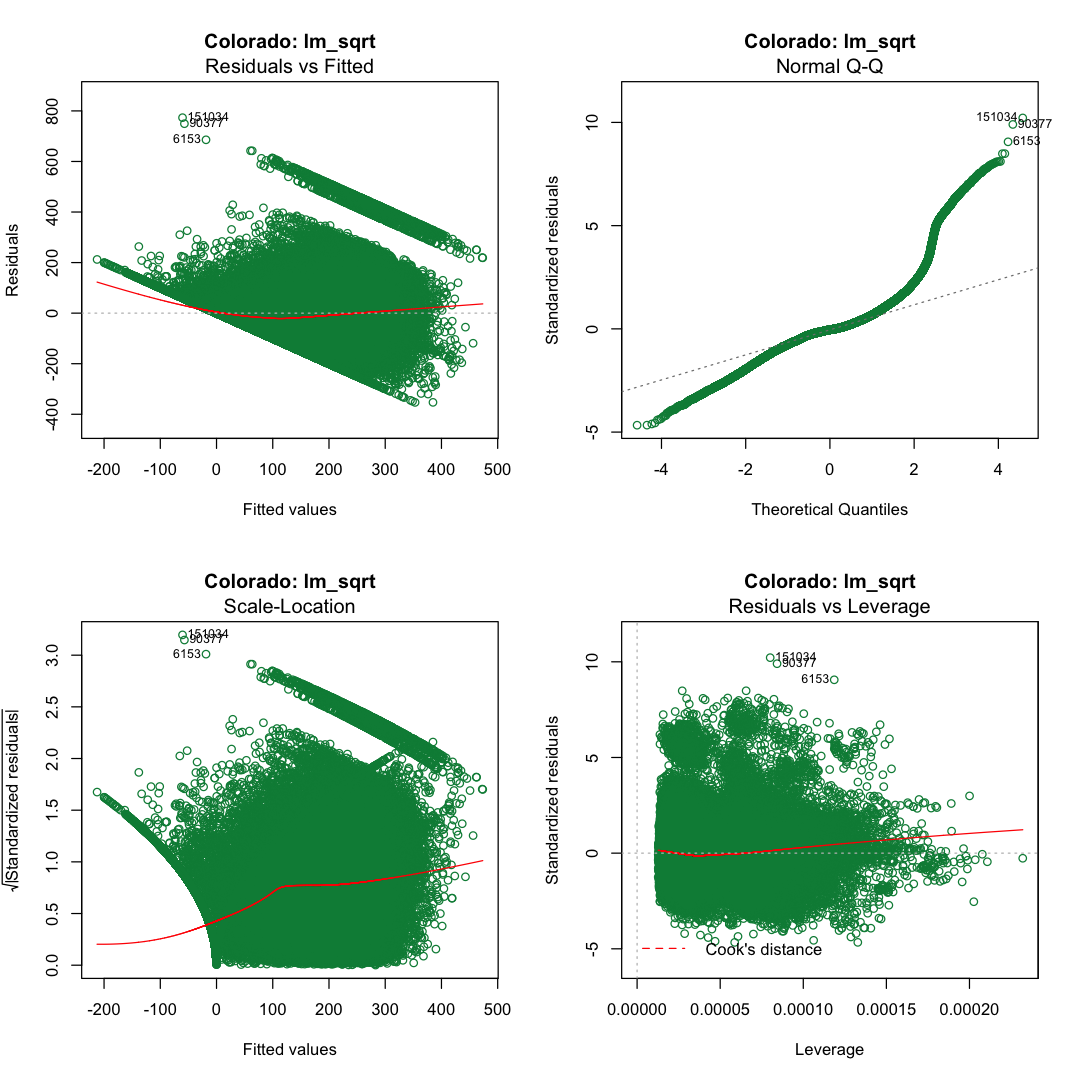

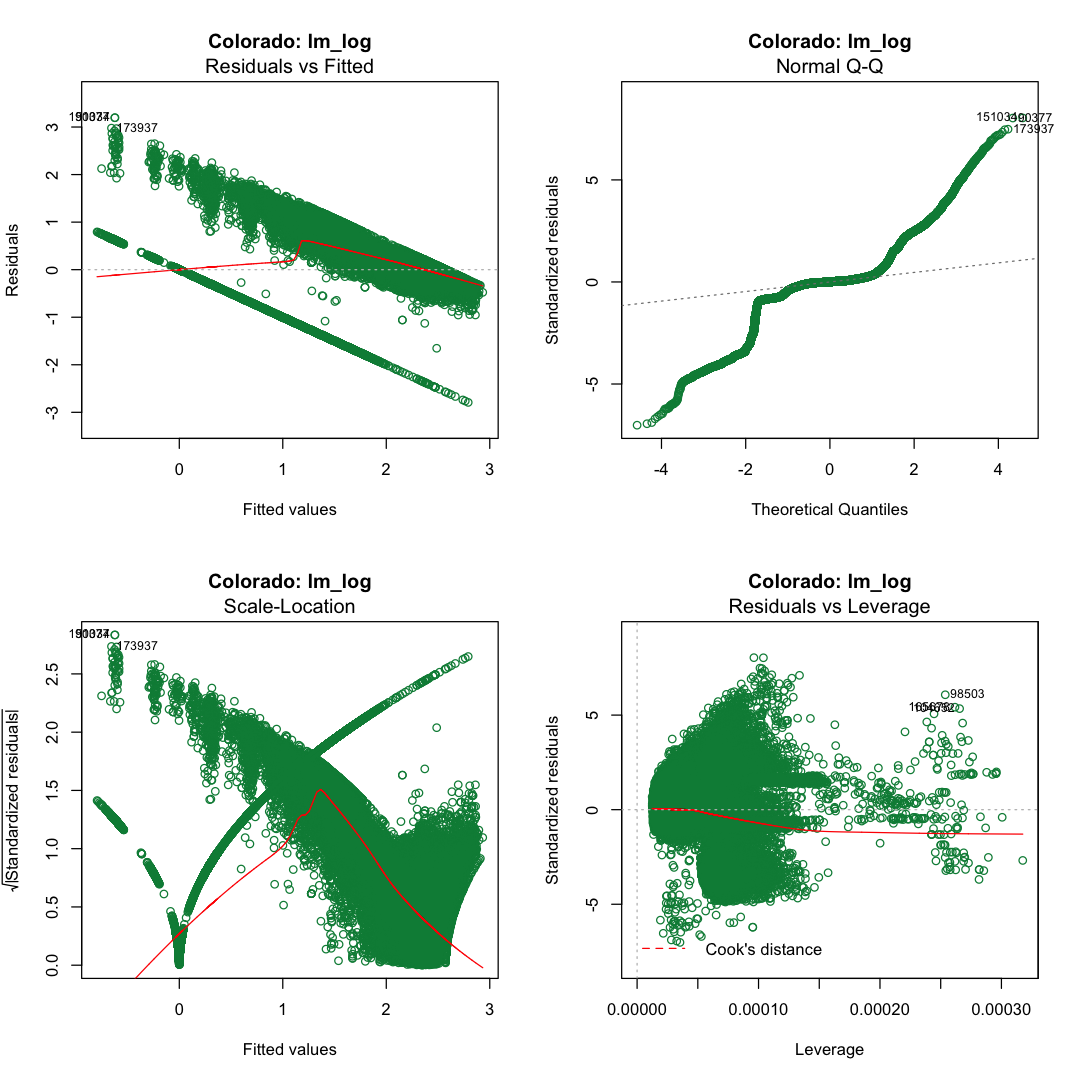

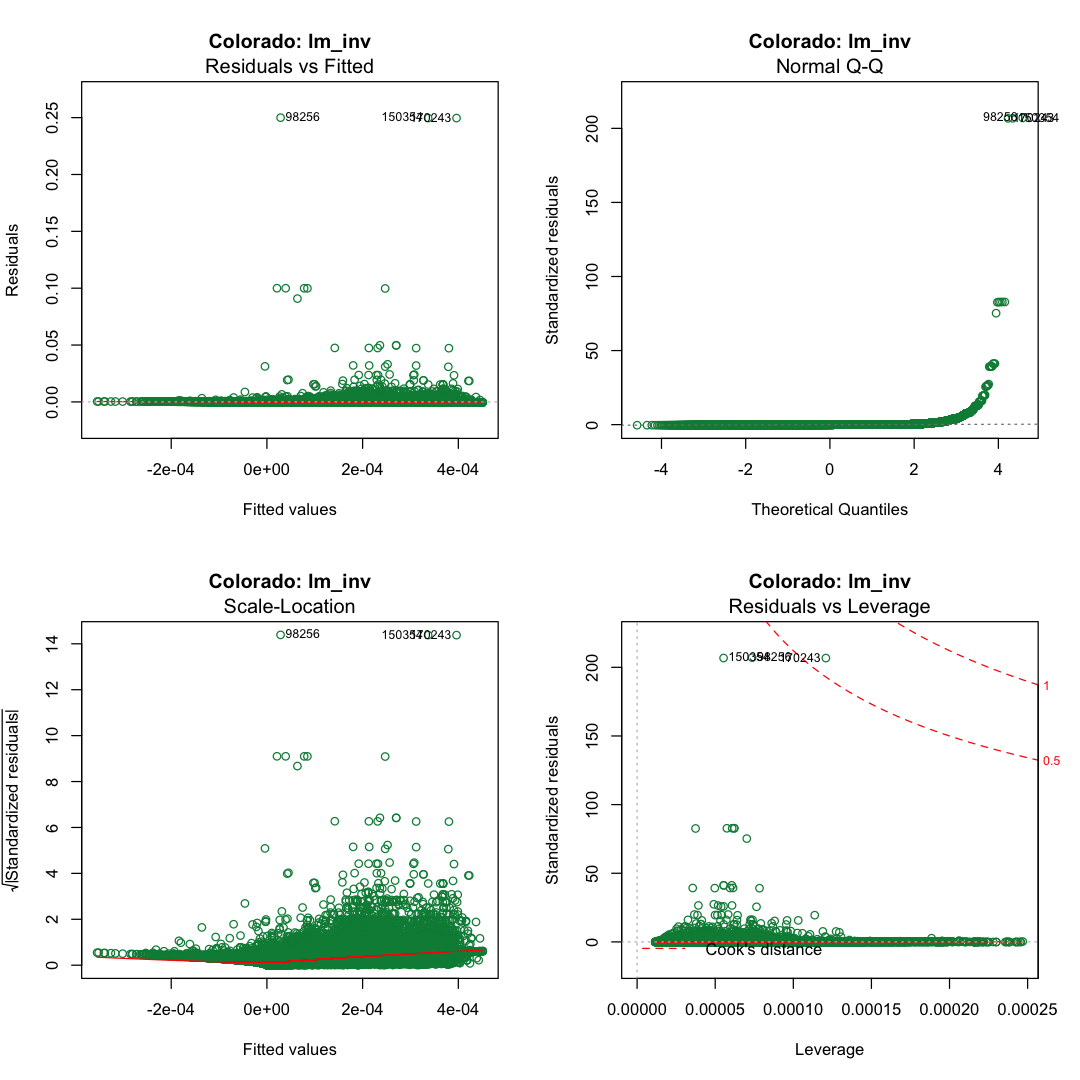

In [12]:
# Created transformation to square root, log, and inverse respectively to check constant variance.
testincome = c()
testincome$CLASSWKR = mn$CLASSWKR
testincome$SEX = mn$SEX

testincome$inc1 = sqrt(mn$INCWAGE)
testincome$sqrt_fam = sqrt(mn$FAMSIZE)
testincome$sqrt_age = sqrt(mn$AGE)
testincome$sqrt_mar = sqrt(mn$MARRNO)
testincome$sqrt_hrs = sqrt(mn$UHRSWORK)
testincome$sqrt_occ = sqrt(mn$OCCSCORE)

testincome$inc2 = mn$INCWAGE
testincome$log_fam = mn$FAMSIZE
testincome$log_age = mn$AGE
testincome$log_mar = mn$MARRNO
testincome$log_hrs = mn$UHRSWORK
testincome$log_occ = mn$OCCSCORE
testincome = na.omit(testincome)

# Takes the log transform of values greater than 0, 
# otherwise we will run into a computational error
testincome$inc2[testincome$inc2 > 0] = log(testincome$inc2[testincome$inc2 > 0])
testincome$inc2[testincome$inc2 > 0] = log(testincome$inc2[testincome$inc2 > 0])
testincome$log_fam[testincome$log_fam > 0] = log(testincome$log_fam[testincome$log_fam > 0])
testincome$log_age[testincome$log_age > 0] = log(testincome$log_age[testincome$log_age > 0])
testincome$log_mar[testincome$log_mar > 0] = log(testincome$log_mar[testincome$log_mar > 0])
testincome$log_hrs[testincome$log_hrs > 0] = log(testincome$log_hrs[testincome$log_hrs > 0])
testincome$log_occ[testincome$log_occ > 0] = log(testincome$log_occ[testincome$log_occ > 0])

testincome$inc3 = mn$INCWAGE
testincome$inv_fam = mn$FAMSIZE
testincome$inv_age = mn$AGE
testincome$inv_mar = mn$MARRNO
testincome$inv_hrs = mn$UHRSWORK
testincome$inv_occ = mn$OCCSCORE

# Takes the inverse transform of values greater than 0, 
# otherwise we will run into a computational error
testincome$inc3[testincome$inc3 > 0] = 1/testincome$inc3[testincome$inc3 > 0]
testincome$inv_fam[testincome$inv_fam > 0] = 1/testincome$inv_fam[testincome$inv_fam > 0]
testincome$inv_age[testincome$inv_age > 0] = 1/testincome$inv_age[testincome$inv_age > 0]
testincome$inv_mar[testincome$inv_mar > 0] = testincome$inv_mar[testincome$inv_mar > 0]
testincome$inv_hrs[testincome$inv_hrs > 0] = testincome$inv_hrs[testincome$inv_hrs > 0]
testincome$inv_occ[testincome$inv_occ > 0] = testincome$inv_occ[testincome$inv_occ > 0]

testincome = data.frame(testincome)

# Models

lm_sqrt = lm(inc1 ~ sqrt_fam + sqrt_age + sqrt_mar + sqrt_hrs + sqrt_occ + CLASSWKR +
             SEX, data = testincome)
lm_log = lm(inc2 ~ log_fam + log_age + log_mar + log_hrs + log_occ + CLASSWKR +
             SEX, data = testincome)
lm_inv = lm(inc3 ~ inv_fam + inv_age + inv_mar + inv_hrs + inv_occ + CLASSWKR +
            SEX, data = testincome)

# Plotting Residuals vs. Fitted, QQ Plot, etc. for lm_sqrt, lm_log, and lm_inv.
options(repr.plot.width = 9, repr.plot.height = 9)
par(mfrow = c(2,2))
plot(lm_sqrt, main = "Minnesota: lm_sqrt", col = "royalblue1")

par(mfrow = c(2,2))
plot(lm_log, main = "Minnesota: lm_log", col = "royalblue1")

par(mfrow = c(2,2))
plot(lm_inv, main = "Minnesota: lm_inv", col = "royalblue1")

# Created transformation to square root, log, and inverse respectively to check constant variance.
testincome = c()
testincome$CLASSWKR = co$CLASSWKR
testincome$SEX = co$SEX

testincome$inc1 = sqrt(co$INCWAGE)
testincome$sqrt_fam = sqrt(co$FAMSIZE)
testincome$sqrt_age = sqrt(co$AGE)
testincome$sqrt_mar = sqrt(co$MARRNO)
testincome$sqrt_hrs = sqrt(co$UHRSWORK)
testincome$sqrt_occ = sqrt(co$OCCSCORE)

testincome$inc2 = co$INCWAGE
testincome$log_fam = co$FAMSIZE
testincome$log_age = co$AGE
testincome$log_mar = co$MARRNO
testincome$log_hrs = co$UHRSWORK
testincome$log_occ = co$OCCSCORE
testincome = na.omit(testincome)

# Takes the log transform of values greater than 0, 
# otherwise we will run into a computational error
testincome$inc2[testincome$inc2 > 0] = log(testincome$inc2[testincome$inc2 > 0])
testincome$inc2[testincome$inc2 > 0] = log(testincome$inc2[testincome$inc2 > 0])
testincome$log_fam[testincome$log_fam > 0] = log(testincome$log_fam[testincome$log_fam > 0])
testincome$log_age[testincome$log_age > 0] = log(testincome$log_age[testincome$log_age > 0])
testincome$log_mar[testincome$log_mar > 0] = log(testincome$log_mar[testincome$log_mar > 0])
testincome$log_hrs[testincome$log_hrs > 0] = log(testincome$log_hrs[testincome$log_hrs > 0])
testincome$log_occ[testincome$log_occ > 0] = log(testincome$log_occ[testincome$log_occ > 0])

testincome$inc3 = co$INCWAGE
testincome$inv_fam = co$FAMSIZE
testincome$inv_age = co$AGE
testincome$inv_mar = co$MARRNO
testincome$inv_hrs = co$UHRSWORK
testincome$inv_occ = co$OCCSCORE

# Takes the inverse transform of values greater than 0, 
# otherwise we will run into a computational error
testincome$inc3[testincome$inc3 > 0] = 1/testincome$inc3[testincome$inc3 > 0]
testincome$inv_fam[testincome$inv_fam > 0] = 1/testincome$inv_fam[testincome$inv_fam > 0]
testincome$inv_age[testincome$inv_age > 0] = 1/testincome$inv_age[testincome$inv_age > 0]
testincome$inv_mar[testincome$inv_mar > 0] = testincome$inv_mar[testincome$inv_mar > 0]
testincome$inv_hrs[testincome$inv_hrs > 0] = testincome$inv_hrs[testincome$inv_hrs > 0]
testincome$inv_occ[testincome$inv_occ > 0] = testincome$inv_occ[testincome$inv_occ > 0]

testincome = data.frame(testincome)

# Models

lm_sqrt = lm(inc1 ~ sqrt_fam + sqrt_age + sqrt_mar + sqrt_hrs + sqrt_occ + CLASSWKR +
            SEX, data = testincome)
lm_log = lm(inc2 ~ log_fam + log_age + log_mar + log_hrs + log_occ + CLASSWKR +
            SEX, data = testincome)
lm_inv = lm(inc3 ~ inv_fam + inv_age + inv_mar + inv_hrs + inv_occ + CLASSWKR +
            SEX, data = testincome)

# Plotting Residuals vs. Fitted, QQ Plot, etc. for lm_sqrt, lm_log, and lm_inv.
options(repr.plot.width = 9, repr.plot.height = 9)
par(mfrow = c(2,2))
plot(lm_sqrt, main = "Colorado: lm_sqrt", col = "springgreen4")

par(mfrow = c(2,2))
plot(lm_log, main = "Colorado: lm_log", col = "springgreen4")

par(mfrow = c(2,2))
plot(lm_inv, main = "Colorado: lm_inv", col = "springgreen4")

Unfortunately, the square root and logorithmic transformations faired no better than our origianl linear models. Both states still showed violations in variance and linearity. The Normal Q-Q has a random string structure that shows nonnormality and the Residuals vs Leverage shows no potential influential points or leverage points. Sadly, the first two transformation didn't imporve our model, howover, the inverse transformation was more promising.

First the Residuals vs Fitted in both states show more consitency around $0$ with a few outliers above $12$. Colorado's Residuals vs Fitted is more consistent in variance with the majority of the points across $0$. Minnesota's Resiudal vs Fitted has a similar plot with points around $0$. Both the plots show us that the points do not violate constanst variance, however, we still need to do further research to conclude to that decision. 

The Normal Q-Q plot for the inverse transformation is a flat line with all the points aligning on the line for Colorado and Minnesota. The points tail off in the end showing some nonnormality at the end of the points in both states. However, we can not conclude if it is or isn't violating linearity assumption becuase the linear line is along $0$. There is no increase or decrease in the linear line. Hence, more research need to be made. 

The Residual vs Leverage plot in both states finally show us some points that can possibly be potential influential points. Most of the points lie around $0$ in Colorado and Minnesota, though, Colorado has a potential influential point and a handful of leverage pooints. Minnesota has no potential influential points, but a few leverage points. These graphs resembles more of our exploratory analysis where **occupational score, income, and hours worked** had more outliers than the other variables. 

Overall, we decided to move forward with our selected linear model since the inverse model showed less issues. 

# Checking for Multicollinearity

Though our model presented evidence that each predictor was necessary we wanted to make sure that there was no multicollinearity. Realistically variables liked **hours worked per work vs occupational score, age vs marriage, and age vs hours worked per week** should show some correlation.  

## Minnesota ##

In [15]:
# Since the transformations failed, 
# we are going to continue with our original model without transformations

v = vif(lm_3)
k = kappa(lm_3)
correlation = cor(model.matrix(lm_3)[,-1])

cat("VIF for the Minnesota dataset is:"); v
cat("The condition number for the Minnesota dataset is:"); k
cat("Correlation Model Matrix for the Minnesota dataset is:"); correlation

VIF for the Minnesota dataset is:

GVIF     Df GVIF^(1/(2*Df))
SEX      1.072358 1  1.035547       
AGE      1.785806 1  1.336341       
MARRNO   1.304837 1  1.142295       
EDUC     1.110222 1  1.053671       
CLASSWKR 3.546338 2  1.372287       
UHRSWORK 2.033330 1  1.425949       
OCCSCORE 2.841562 1  1.685693

The condition number for the Minnesota dataset is:

[1] 291.4274

Correlation Model Matrix for the Minnesota dataset is:

SEXMale      AGE         MARRNO      
SEXMale                  1.000000000 -0.03672824 -0.059084758
AGE                     -0.036728239  1.00000000  0.448833756
MARRNO                  -0.059084758  0.44883376  1.000000000
EDUCHigh School or Less  0.053602325  0.14004772 -0.009269013
CLASSWKRSelf-employed    0.123137889  0.04051634  0.062142192
CLASSWKRWorks for wages -0.003484196 -0.47078507 -0.138822334
UHRSWORK                 0.174927503 -0.42109493 -0.061212850
OCCSCORE                 0.144203411 -0.34897610 -0.024518222
                        EDUCHigh School or Less CLASSWKRSelf-employed
SEXMale                  0.053602325             0.123137889         
AGE                      0.140047723             0.040516336         
MARRNO                  -0.009269013             0.062142192         
EDUCHigh School or Less  1.000000000            -0.004130447         
CLASSWKRSelf-employed   -0.004130447             1.000000000         
CLASSWKRWorks for wages -0.170480644            -0.492159465         
UHRSWORK                -0.193432496             0.162898050         
OCCSCORE                -0.283487525             0.146825345         
                        CLASSWKRWorks for wages UHRSWORK    OCCSCORE   
SEXMale                 -0.003484196             0.17492750  0.14420341
AGE                     -0.470785072            -0.42109493 -0.34897610
MARRNO                  -0.138822334            -0.06121285 -0.02451822
EDUCHigh School or Less -0.170480644            -0.19343250 -0.28348753
CLASSWKRSelf-employed   -0.492159465             0.16289805  0.14682534
CLASSWKRWorks for wages  1.000000000             0.49348959  0.59357700
UHRSWORK                 0.493489594             1.00000000  0.61966765
OCCSCORE                 0.593576999             0.61966765  1.00000000

It was questionable that the VIF for each predictor was less than $5$, however, the condition number is very high. The condition number gives us a reason that there is multicollinearity. Observing the correlation table we see that some variables are partially correlated such as class of work vs age, age vs married, hours worked per week vs work wage and more. Despite that, most of the correlation values are equal or below $|0.50|$, hence correlation is not as evident. Still a little shocking becuase one would expect strong correlation between these variables.  


## Colorado ##

In [16]:
v_c = vif(lmc_3)
k_c = kappa(lmc_3)
correlation_c = cor(model.matrix(lmc_3)[,-1])

cat("VIF for the Colorado dataset is:"); v_c
cat("The condition number for the Colorado dataset is:"); k_c
cat("Correlation Model Matrix for the Colorado dataset is:"); correlation_c

VIF for the Colorado dataset is:

GVIF     Df GVIF^(1/(2*Df))
SEX      1.062217 1  1.030639       
AGE      1.712289 1  1.308545       
MARRNO   1.350457 1  1.162092       
EDUC     1.088235 1  1.043185       
CLASSWKR 3.419890 2  1.359888       
UHRSWORK 2.021369 1  1.421748       
OCCSCORE 2.805418 1  1.674938

The condition number for the Colorado dataset is:

[1] 282.1546

Correlation Model Matrix for the Colorado dataset is:

SEXMale     AGE          MARRNO     
SEXMale                  1.00000000 -0.050745503 -0.06751557
AGE                     -0.05074550  1.000000000  0.48961612
MARRNO                  -0.06751557  0.489616117  1.00000000
EDUCHigh School or Less  0.02582314  0.007703764 -0.01719788
CLASSWKRSelf-employed    0.06575163  0.062913495  0.07357839
CLASSWKRWorks for wages  0.04968261 -0.429024011 -0.15066917
UHRSWORK                 0.18846830 -0.378788267 -0.08972016
OCCSCORE                 0.15770840 -0.269854734 -0.02681930
                        EDUCHigh School or Less CLASSWKRSelf-employed
SEXMale                  0.025823138             0.06575163          
AGE                      0.007703764             0.06291350          
MARRNO                  -0.017197877             0.07357839          
EDUCHigh School or Less  1.000000000            -0.04826393          
CLASSWKRSelf-employed   -0.048263930             1.00000000          
CLASSWKRWorks for wages -0.108146545            -0.48944736          
UHRSWORK                -0.153898856             0.09716755          
OCCSCORE                -0.260625883             0.17754938          
                        CLASSWKRWorks for wages UHRSWORK    OCCSCORE  
SEXMale                  0.04968261              0.18846830  0.1577084
AGE                     -0.42902401             -0.37878827 -0.2698547
MARRNO                  -0.15066917             -0.08972016 -0.0268193
EDUCHigh School or Less -0.10814655             -0.15389886 -0.2606259
CLASSWKRSelf-employed   -0.48944736              0.09716755  0.1775494
CLASSWKRWorks for wages  1.00000000              0.53869822  0.5707517
UHRSWORK                 0.53869822              1.00000000  0.6147268
OCCSCORE                 0.57075168              0.61472680  1.0000000

Similarly with Minnesota's analysis the VIF for each predictor was below $5$ and the condition number was still very high. Checking the correlation table we have the same predictors being correlated as in Minnesota with there correlation value to be less than or equal to $|0.50|$. 

To convince ourselves more we decided to check how the VIF and condition number would change if we removed the predictor with the highest VIF. Below is our analysis. 

## Removing Predictor with the Highest VIF ##

From our table above we decided to remove **class of work** from our linear model because it has the highest VIF. Below was we see the output of our decision. 

## Minnesota ##

In [17]:
#Removing predictor with the highest VIF
lm_3 = update(lm_3, .~. - CLASSWKR)
cat("VIF after removing CLASSWKR for Minnesota dataset is:")
vif(lm_3)

cat("The updated condition number for the Minnesota dataset is:")
kappa(lm_3)

VIF after removing CLASSWKR for Minnesota dataset is:

SEX      AGE   MARRNO     EDUC UHRSWORK OCCSCORE 
1.053326 1.604657 1.304053 1.102388 1.801962 1.742139

The updated condition number for the Minnesota dataset is:

[1] 176.4184

As you can see, the VIF for the remaining predictors decrease to be below $2$, however, the important value is the conditioning number. The condition number decreased by more than $100$ which means thath removing class of work removed some multicollinearity. 

## Colorado ##

In [18]:
#Removing predictor with the highest VIF
lmc_3 = update(lmc_3, .~. - CLASSWKR)
cat("VIF after removing CLASSWKR for Colorado dataset is:")
vif(lmc_3)

cat("The updated condition number for the Colorado dataset is:")
kappa(lmc_3)

VIF after removing CLASSWKR for Colorado dataset is:

SEX      AGE   MARRNO     EDUC UHRSWORK OCCSCORE 
1.052248 1.567753 1.349020 1.083746 1.778521 1.708990

The updated condition number for the Colorado dataset is:

[1] 167.2861

Similarly with Colorado, the VIF of the remaining predictors decreased to be less than $2$ and, again, the conditioning number decreased by more than $100$. If we remove more predictors, most likely the conditioning number will reduce to lower than $100$, however, this will lose significant data and information. 

## MSE and MSPE on Testing and Training data ##

In [20]:
set.seed(00000)
n = nrow(mn)
split = floor(0.80 * n)

sample_set = sample.int(n, size = split, replace = FALSE)

train_m = mn[sample_set, ]
test_m = mn[-sample_set, ]

n = nrow(co)
split = floor(0.80 * n)

sample_set = sample.int(n, size = split, replace = FALSE)

train_c = co[sample_set, ]
test_c =  co[-sample_set, ]

In [21]:
mlr_inc_m = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + 
             UHRSWORK + OCCSCORE data = train_m)
mlr_inc_c = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + 
             UHRSWORK + OCCSCORE, data = train_c)

In [22]:
# MSPE for Minnesota
k = nrow(test_m) #number of rows

y = train_m$INCWAGE
y_star = test_m$INCWAGE

X = cbind(1, train_m$AGE, train_m$FAMSIZE, train_m$MARRNO, train_m$UHRSWORK, train_m$OCCSCORE) #train model

X_star = cbind(1, test_m$AGE, test_m$FAMSIZE, test_m$MARRNO, test_m$UHRSWORK, test_m$OCCSCORE) #test model

beta = solve(t(X)%*%X)%*%t(X)%*%y

y_hat_star = X_star%*%beta #i'th response value in test set

MSPE_m = (1/k)*sum((y_star - y_hat_star)^2)

cat("MSPE for the Minnesota dataset is:", MSPE_m, "\n")


# # MSPE for Colorado
k = nrow(test_c)

y = train_c$INCWAGE
y_star = test_c$INCWAGE

X = cbind(1, train_c$AGE, train_c$FAMSIZE, train_c$MARRNO, train_c$UHRSWORK, train_c$OCCSCORE) #train model
X_star = cbind(1, test_c$AGE, test_c$FAMSIZE, test_c$MARRNO, test_c$UHRSWORK, test_c$OCCSCORE) #test model

beta = solve(t(X)%*%X)%*%t(X)%*%y

y_hat_star = X_star%*%beta

MSPE_c = (1/k)*sum((y_star - y_hat_star)^2)

cat("MSPE for the Colorado dataset is:", MSPE_c)

MSPE for the Minnesota dataset is: 1789101585 
MSPE for the Colorado dataset is: 2177939189

In [23]:
# MSE for Minnesota
n = nrow(train_m) # number of rows
y = train_m$INCWAGE
X = cbind(1, train_m$AGE, train_m$FAMSIZE, train_m$MARRNO, train_m$UHRSWORK, train_m$OCCSCORE)
beta = solve(t(X)%*%X)%*%t(X)%*%y #beta hat
y_hat = X%*%beta # computing y_hat
MSE_m = (1/n)*sum((y - y_hat)^2); 

cat("MSE for the Minnesota dataset is:", MSE_m, "\n")


# MSE for Colorado
n = nrow(train_c) # number of rows
y = train_c$INCWAGE
X = cbind(1, train_c$AGE, train_c$FAMSIZE, train_c$MARRNO, train_c$UHRSWORK, train_c$OCCSCORE)
beta = solve(t(X)%*%X)%*%t(X)%*%y #beta hat
y_hat = X%*%beta # computing y_hat
MSE_c = (1/n)*sum((y - y_hat)^2); 

cat("MSE for the Colorado dataset is:", MSE_c)

MSE for the Minnesota dataset is: 1866276235 
MSE for the Colorado dataset is: 2248374967

In [24]:
MSE_m - MSPE_m

MSE_c - MSPE_c

MSPE_m/MSE_m

MSPE_c/MSE_c

[1] 77174650

[1] 70435777

[1] 0.9586478

[1] 0.9686726

## Prediction Plot ##

From all our analysis, statistical inferences, linear regression model assumption, predictor selection, and VIF and conditioning number checks we decided to move forward with our linear model and check how well it predicted. The predictors we concluded with were **sex, age, married, education, hours worked per week, and occupation score**. We decided not to remove **class of work** since its initial VIF was below $5$. We also removed **race** because of the misinterpration in our earlier linear model. We ran the model on the full dataset and not a test dataset to verify its completeness. 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


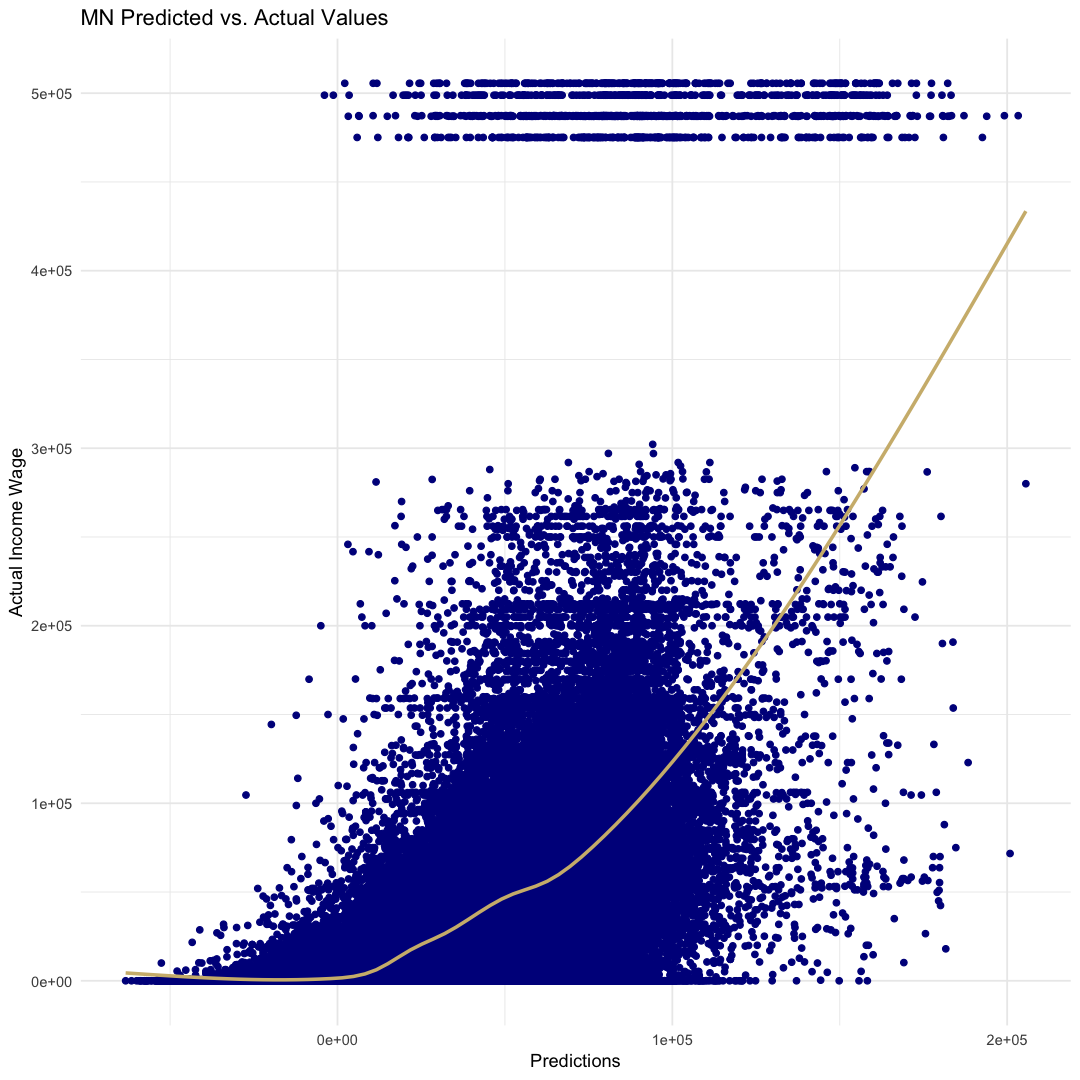

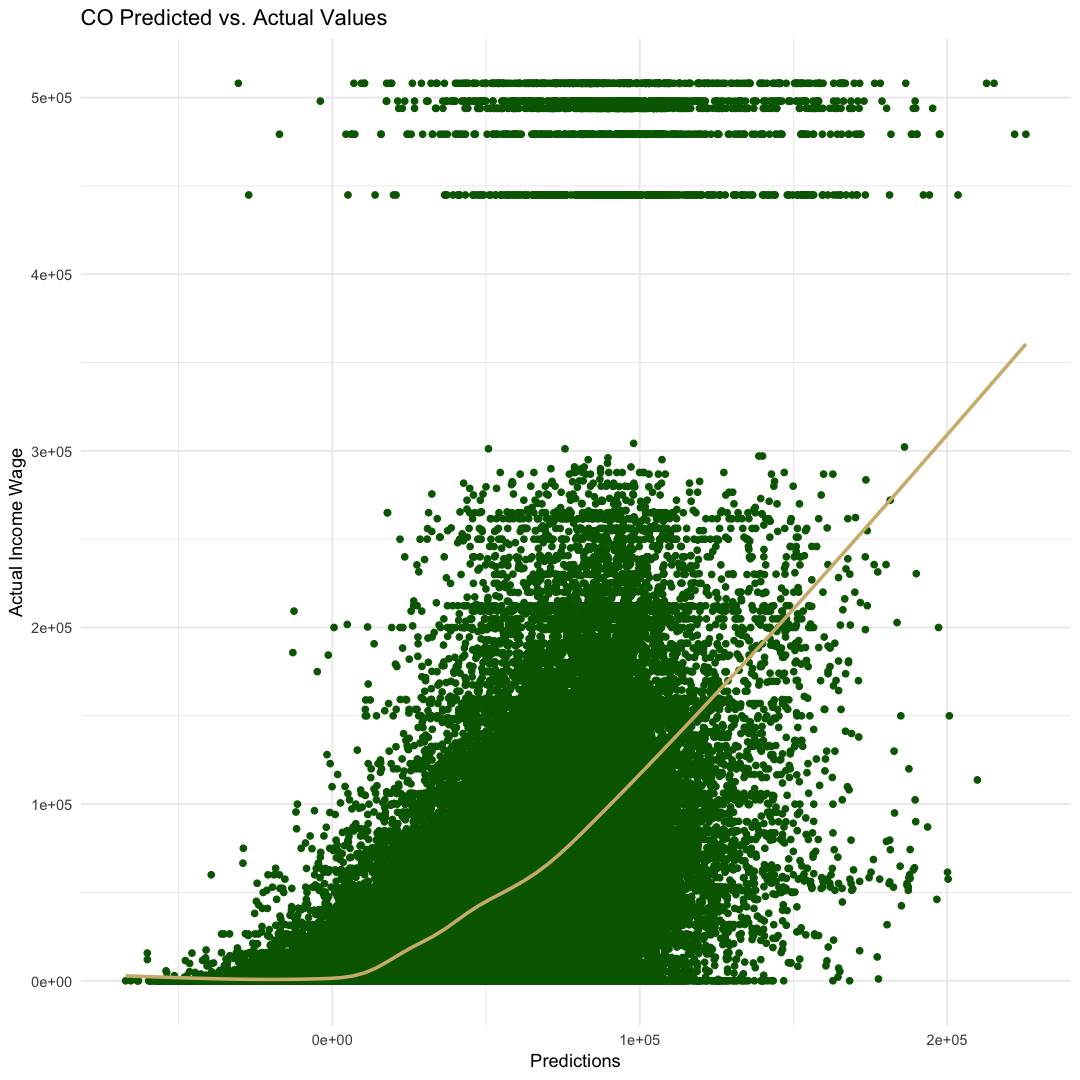

In [26]:
mn_new = select(mn, -c(RACE, DIFFSENS))
co_new = select(co, -c(RACE, DIFFSENS))
lmod_m = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + UHRSWORK + OCCSCORE, mn)
 
ggplot(mn_new, aes(x = predict(lmod_m, type = 'response'), y = INCWAGE )) + 
    geom_point(col = "dark blue") + 
    geom_smooth(se = F, col = "#CFB87C") +
    labs(x = 'Predictions', y= 'Actual Income Wage',title='MN Predicted vs. Actual Values') + 
    theme_minimal()

lmod_c = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + UHRSWORK + OCCSCORE, co)
 
ggplot(co_new, aes(x = predict(lmod_c, type = 'response'), y = INCWAGE )) + 
    geom_point(col = "dark green") + 
    geom_smooth(se = F, col = "#CFB87C") +
    labs(x = 'Predictions', y= 'Actual Income Wage',title='CO Predicted vs. Actual Values') + 
    theme_minimal()

Minnesota's and Colorado's prediction plots have a similar resemblance with many points around the middle of the linear plot. The plots display our prediction vs the actual income value. It can be seen that our linear model crosses through a collection of points therefore calculating most of the values correctly. What makes the dataset difficult is the amount of data there is and the difficulty in analyzing human behavior. Creating a linear model in the sociosciences can be complicated due to the amount of convulated data there is. Assumptions are a huge role in sociosciences because statistically we must be aware of our limitations of our data and understanding the right assumption to be conditioned on. Socially, we cant assume some one's income based on race and occupation. The extent to where assumption are falsifiable is when you are conditioning on variables that are affected by race, family size, and occupation. Our linear model could not pick-up on every association or correlation, however, we are confident that this prediction plot has done a fair job. Also, there is a lot of underlying and missing data which makes our analysis incomplete.

Continuing on our analysis of the plot, we can see that both plots have a large amount of outlier points near $500,000$, however, it is not enough to skew our linear model. The reason for this could be that there is so much data between the values of $0$ to $300,000$ that the amount of outliers is miniscule to the amount of data there is in the center. 

# Logistic Regression

In [83]:
mn$EDUC = as_factor(mn$EDUC)
mn$DIFFSENS = as_factor(mn$DIFFSENS)
mn$SEX = as_factor(mn$SEX)
mn$RACE = as_factor(mn$RACE)

co$EDUC = as_factor(co$EDUC)
co$CLASSWKR = as_factor(co$CLASSWKR)
co$DIFFSENS = as_factor(co$DIFFSENS)
co$SEX = as_factor(co$SEX)
co$RACE = as_factor(co$RACE)

In [84]:
mn$INCTHRES = NA
mn$INCTHRES[mn$INCWAGE < 35000] =  0
mn$INCTHRES[mn$INCWAGE > 35000] =  1

co$INCTHRESH = NA
co$INCTHRESH[co$INCWAGE < 35000] =  0
co$INCTHRESH[co$INCWAGE > 35000] =  1

In [85]:
glm_mn = glm(INCTHRES ~ SEX + AGE + MARRNO + EDUC + 
             UHRSWORK + OCCSCORE + DIFFSENS + RACE, data = mn, family = binomial)
summary(glm_mn)

glm_co = glm(INCTHRESH ~ SEX + AGE + MARRNO + EDUC + 
             CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS + RACE, data = co, 
             family = binomial)
summary(glm_co)


Call:
glm(formula = INCTHRES ~ SEX + AGE + MARRNO + EDUC + UHRSWORK + 
    OCCSCORE + DIFFSENS + RACE, family = binomial, data = mn)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.9409  -0.5454  -0.1122   0.6806   3.1220  

Coefficients:
                                          Estimate Std. Error  z value Pr(>|z|)
(Intercept)                             -5.8211565  0.0510955 -113.927  < 2e-16
SEXMale                                  0.1697083  0.0126977   13.365  < 2e-16
AGE                                      0.0015311  0.0004942    3.098  0.00195
MARRNO                                   0.3972877  0.0107040   37.116  < 2e-16
EDUCHigh School or Less                 -0.8340890  0.0132142  -63.121  < 2e-16
UHRSWORK                                 0.0878443  0.0005493  159.907  < 2e-16
OCCSCORE                                 0.0606324  0.0006627   91.494  < 2e-16
DIFFSENSNo vision or hearing difficulty  0.5020317  0.0352454   14.244  < 2e-16
RACEOther Race   


Call:
glm(formula = INCTHRESH ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + 
    UHRSWORK + OCCSCORE + DIFFSENS + RACE, family = binomial, 
    data = co)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1154  -0.4651  -0.0001   0.5790   3.5993  

Coefficients:
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                             -2.242e+01  4.818e+01  -0.465 0.641689
SEXMale                                  2.478e-01  1.336e-02  18.543  < 2e-16
AGE                                      2.132e-02  5.424e-04  39.300  < 2e-16
MARRNO                                   3.026e-01  1.031e-02  29.340  < 2e-16
EDUCCollege or More                      8.346e-01  1.441e-02  57.921  < 2e-16
CLASSWKRSelf-employed                    1.236e+01  4.818e+01   0.256 0.797609
CLASSWKRWorks for wages                  1.446e+01  4.818e+01   0.300 0.764048
UHRSWORK                                 1.005e-01  6.234e-04 161.185  < 2e-16
OCCSCORE 

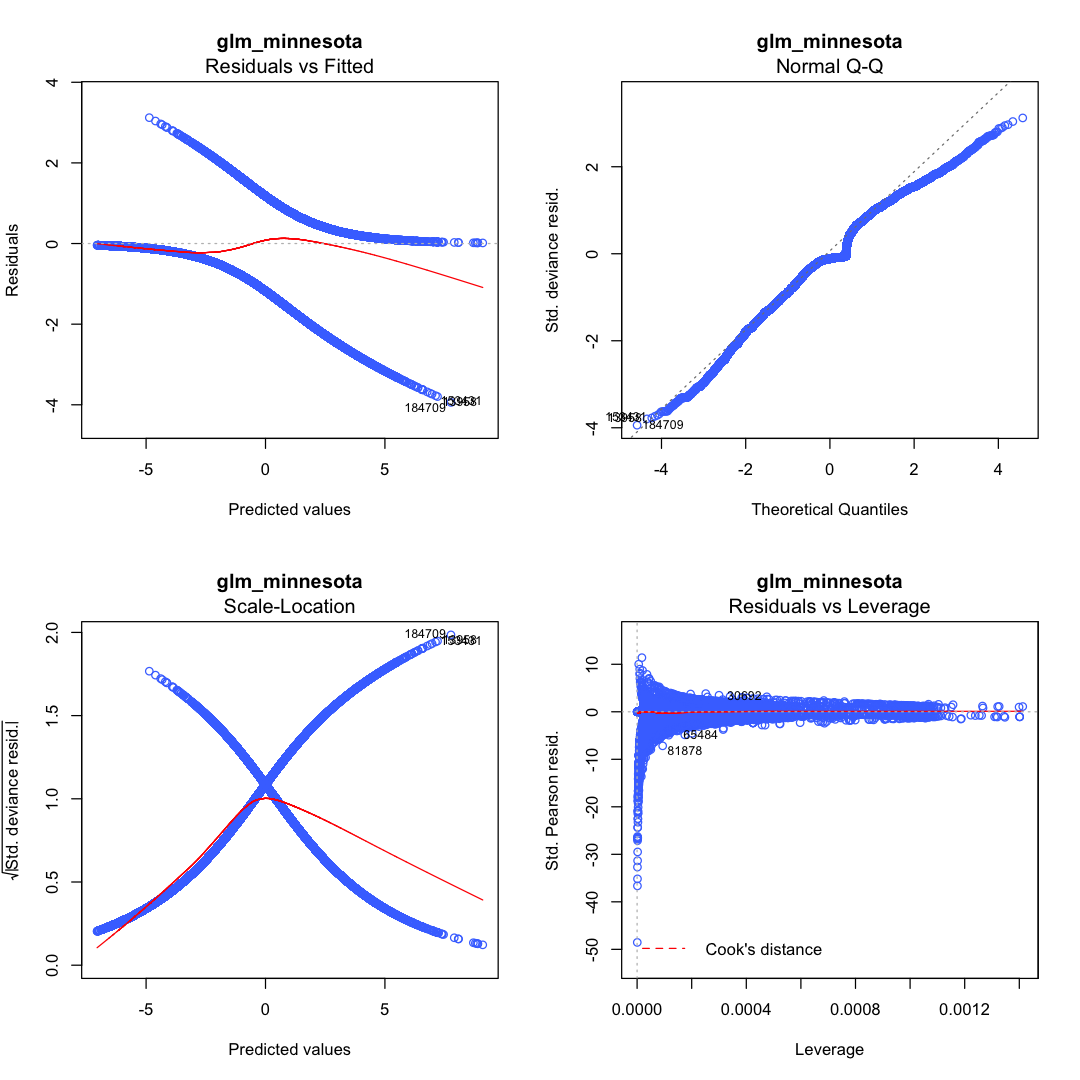

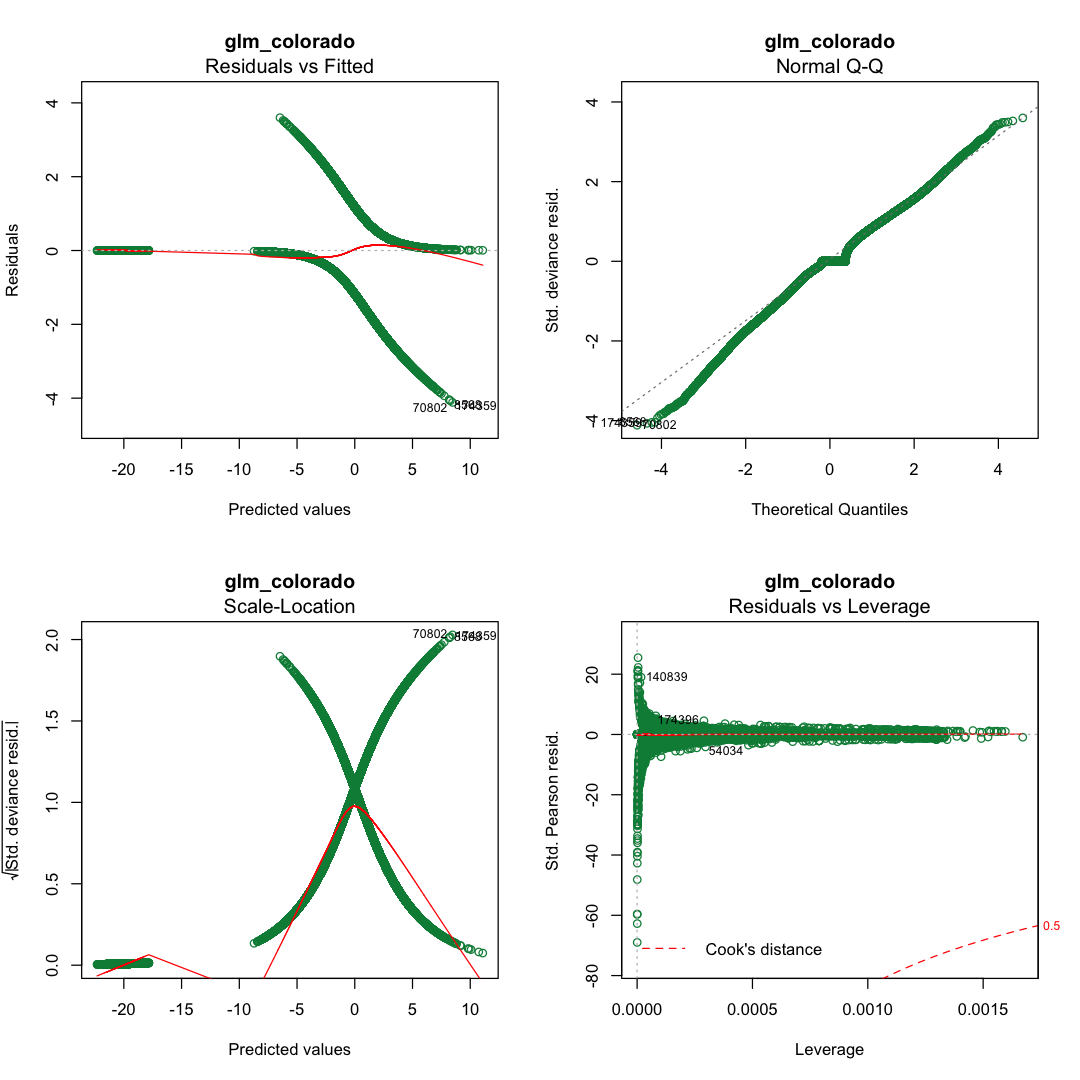

In [66]:
options(repr.plot.width = 9, repr.plot.height = 9)
par(mfrow = c(2,2))
plot(glm_mn, main = "glm_minnesota", col = "royalblue1")
plot(glm_co, main = "glm_colorado", col = "springgreen4")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


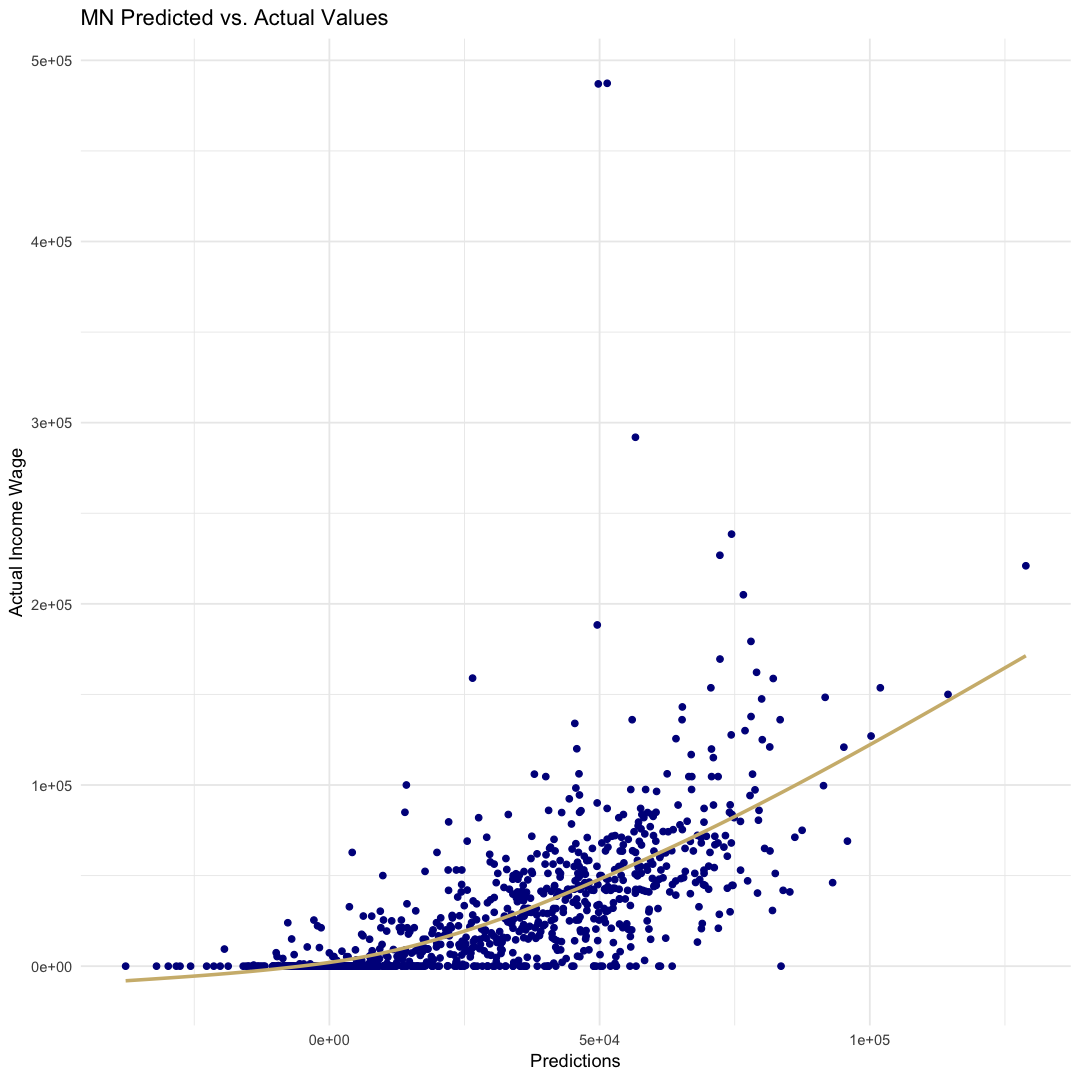

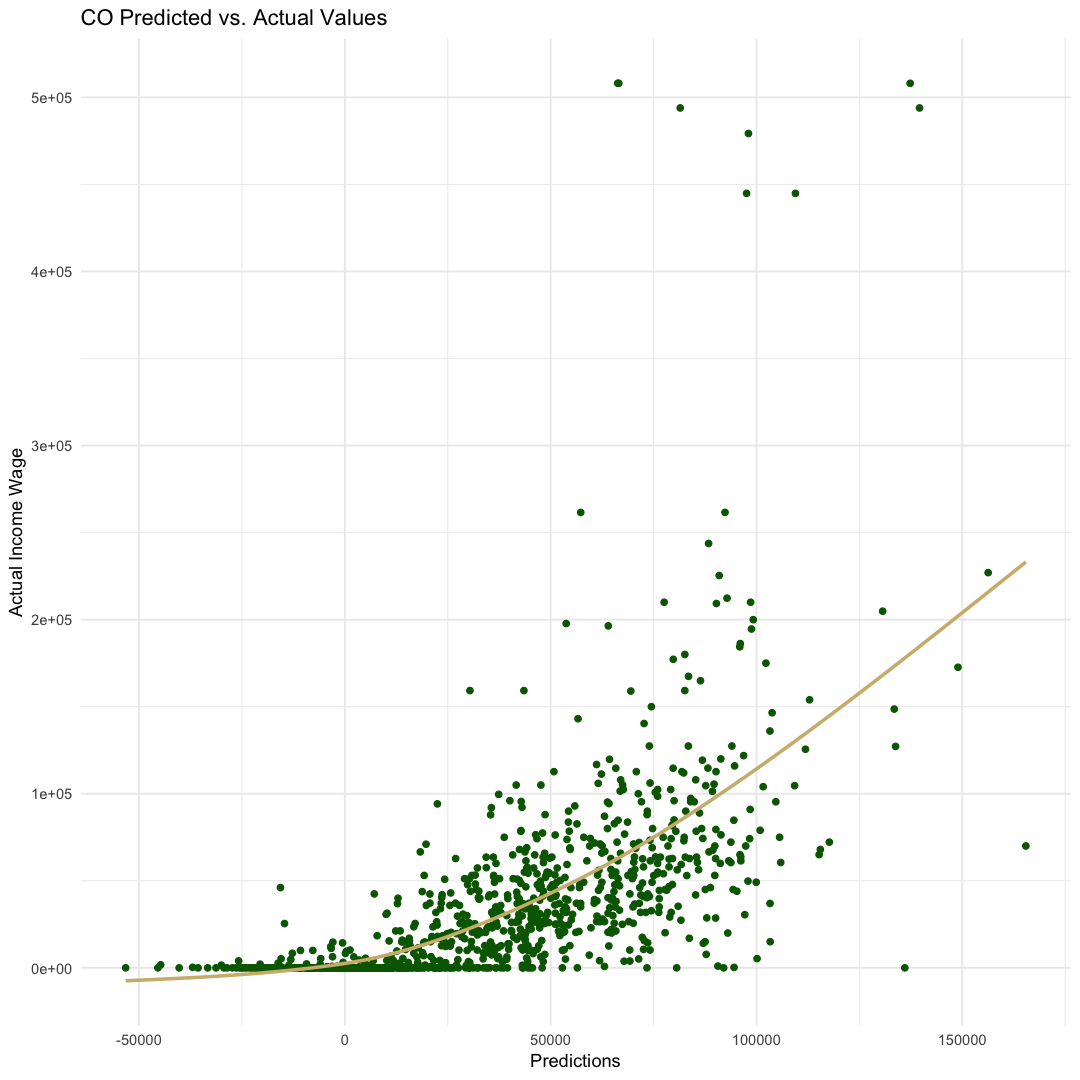

In [68]:
set.seed(00000)
n = nrow(mn)
split = floor(0.004671 * n)

sample_set = sample.int(n, size = split, replace = FALSE)

tinyTest = mn[sample_set, ]


lmod = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + 
             CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS + RACE, tinyTest)
 
ggplot(tinyTest, aes(x = predict(lmod, type = 'response'), y = INCWAGE )) + 
    geom_point(col = "dark blue") + 
    geom_smooth(se = F, col = "#CFB87C") +
    labs(x = 'Predictions', y= 'Actual Income Wage',title='MN Predicted vs. Actual Values') + 
    theme_minimal()

set.seed(00000)
n = nrow(co)
split = floor(0.004671 * n)

sample_set = sample.int(n, size = split, replace = FALSE)

tinyTest = co[sample_set, ]


lmod = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + 
             CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS + RACE, tinyTest)
 
ggplot(tinyTest, aes(x = predict(lmod, type = 'response'), y = INCWAGE )) + 
    geom_point(col = "dark green") + 
    geom_smooth(se = F, col = "#CFB87C") +
    labs(x = 'Predictions', y= 'Actual Income Wage',title='CO Predicted vs. Actual Values') + 
    theme_minimal()